# **UCI Heart Disease Multiclass Classification Project**


For our Machine Learning project, we decided to work on heart disease multiclass classification. This project is further researched using Chip Huyen's recent book " Designing Machine Learning Systems ", through which we gained granular ML-related knowledge, especially when it comes to EDA and feature engineering. The ultimate goal of this project is predicting heart disease stages for patients depending on a variety of determining health factors and tests.

# **UCI Heart Disease Data**

This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

Our dataset contains :

*  id (Unique id for each patient)
* age (Age of the patient in years)
* dataset (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]




We particularly chose this data because it resembles a lot data that is found in the real-world and in production.

## **Exploratory Data Analysis (EDA)**

### **Libraries' Importation**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### **Data Loading**

In [ ]:
#Reading the data
data=pd.read_csv("heart_disease_uci.csv",delimiter=',')

### **Data's First Impression**

In [ ]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
data.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [ ]:
data.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

In [ ]:
#checking the precentages of missing data in each column
data.isnull().sum()/920*100

id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64

### **Data Correlation**

The point of obseriving correlations between variables is to determine if we can drop certain features already, as we all know highly correlated features add no to few additional information to the model and further increases its complexity. Looking at the correlation matrix it's safe to assume that we don't really have any high correlations.

<ipython-input-133-4a81ce6af141>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


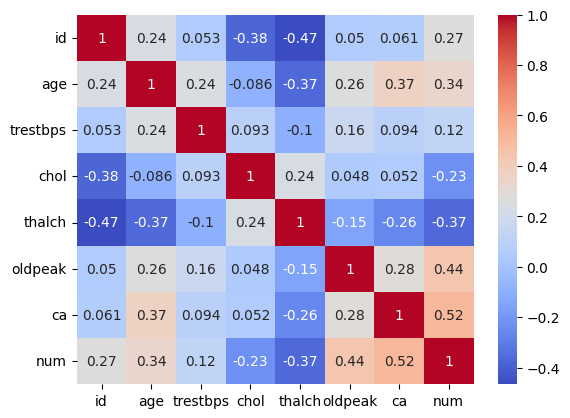

In [ ]:
#Plotting the correlation matrix to understand the correlation between the different features
corr_matrix = data.corr()
# plot correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
# show plot
plt.show();

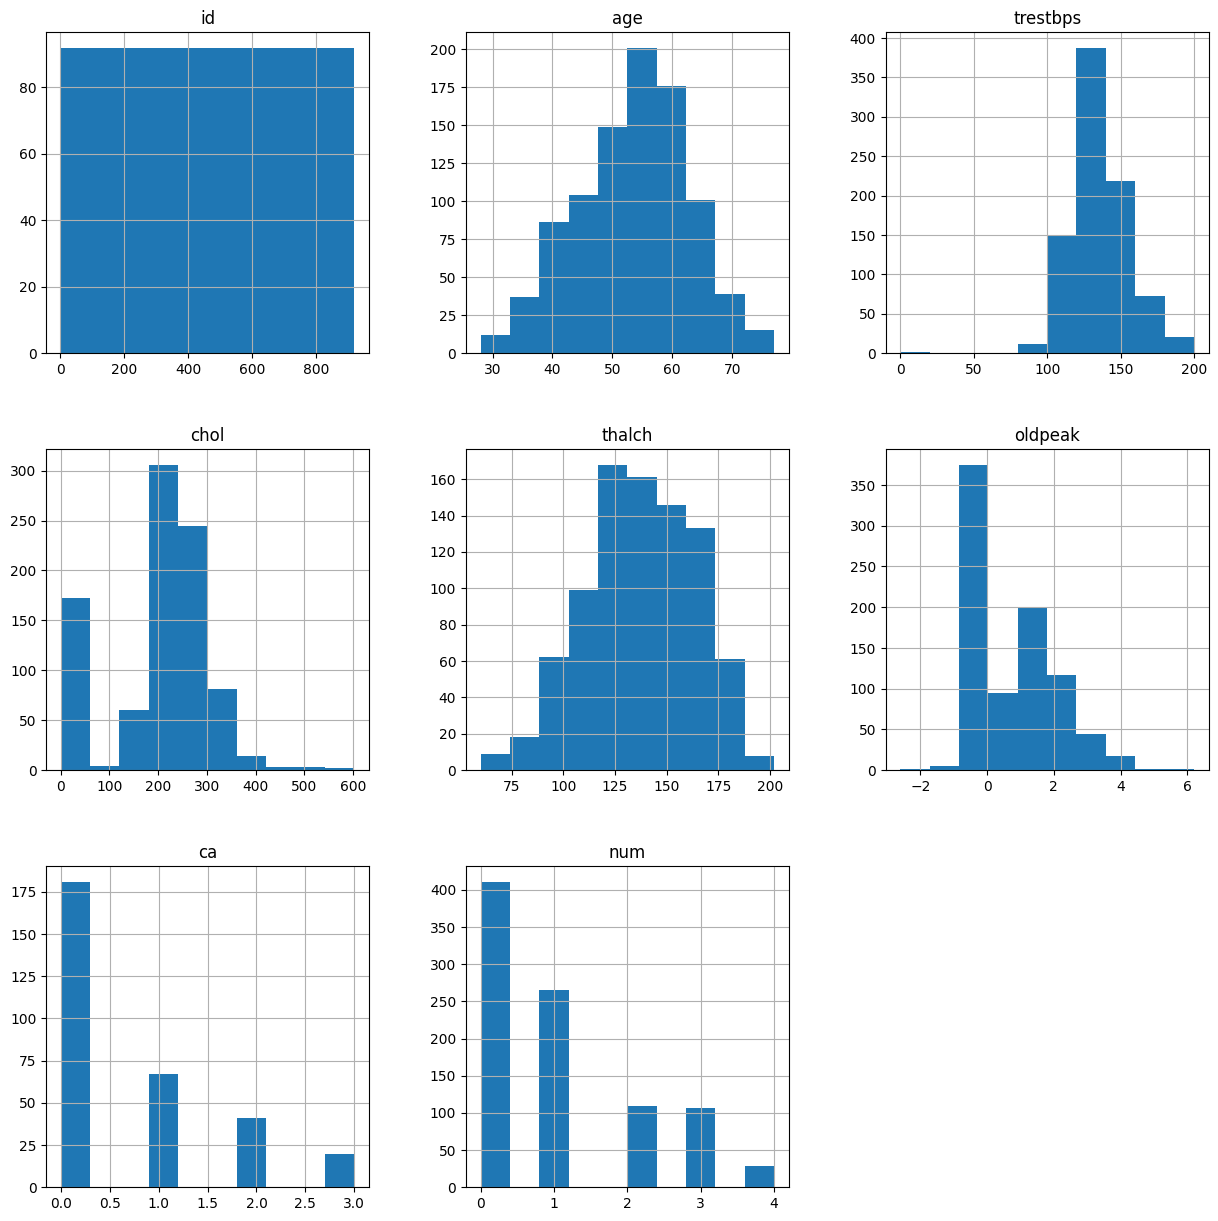

In [ ]:
#Verifying if the data is skewed or not for each column in order to handle missing values
data.hist(figsize=(15,15));

The reason we plotted the distribution of our different variables is because we're going to need to study the skewness of data later when handing missing values and deciding on what to impute the missing data with.

1. If a variable is normally distributed, the mean, median, and mode, are approximately the same. Therefore, replacing missing values by the mean and the median are equivalent. Replacing missing data by the mode is not common practice for numerical variables.

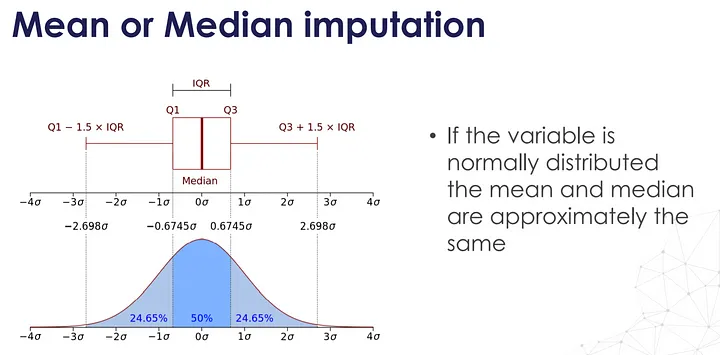




---


2. If the variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the median is a better representation of the majority of the values in the variable.
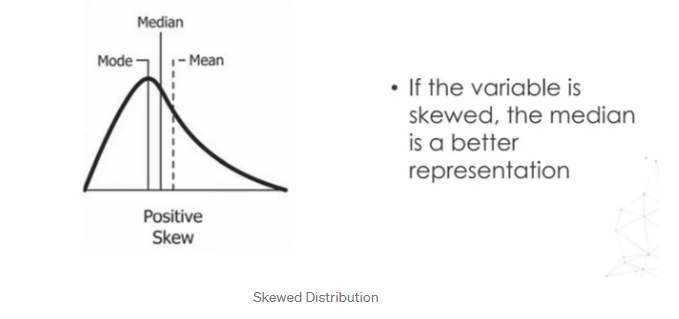

As we can see here, thalch is of norma distribution, meanwhile, oldpeak can be caracterized as positively skewed.

### **Feature Engineering And Handling Missing Values**

In this part, we're going to look at our features / variables one by one.

#### **Sex** **Feature**

This feature represents the gender of the individuals and it contains two values : Male and Female.

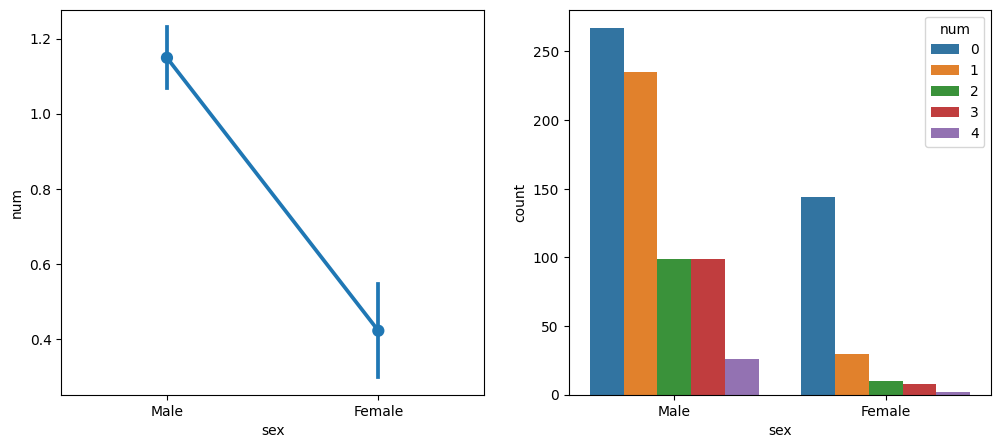

In [ ]:
#Data Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.pointplot(data=data, x="sex", y="num", ax=ax1)
sns.countplot(data=data, x="sex", hue="num", ax=ax2);

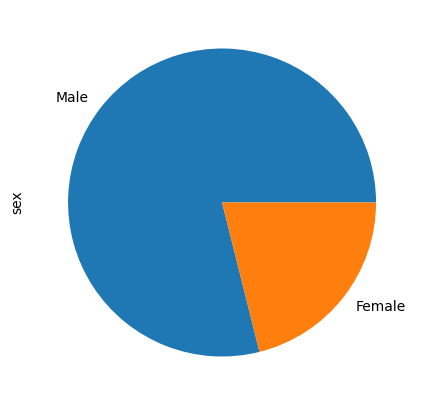

In [ ]:
#Number of individuals in each category
sex=data['sex'].value_counts()
sex.plot(kind='pie',figsize=(10, 5));

As per the last two figures, we can clearly see that our data is dominated by male patients. Moreover, we can notice that class '0' heart disease, which indicates ' no heart disease ' diagnosis, is the most common label in our dataset. While studying this feature, we already knew that our model will be biased against women ( the model won't make good predictions for women ) but we know for sure we can't undersample the male category ( we're going to loose a lot of samples in our data ), as we can't oversample the female category. our intuition here is that sampling methods won't work in our case, because we're most likely change the distribution of data, as we all know, men are more likely to develop heart disease, and it would be a good idea to model the data as it is. In the training process, however, we can try a various of techniques there such as Stratified k-fold cross-validation as seen in the picture below.

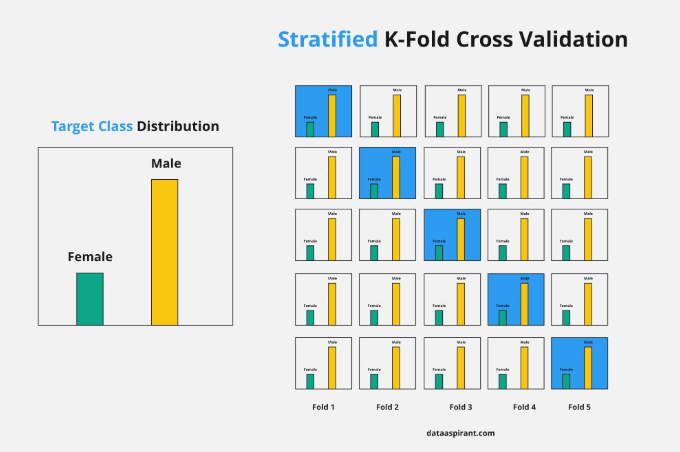

##### **Feature Encoding**

Because this is categorical variable, we need to perform feature encoding and turn it into a quantitative one. We had the choice between imputing the female and male values with 0's and 1's then changing the column type, but then we proceeded with the creation of dummy variables for both categories to avoid additional bias caused by assigning different/ higher values to the different categories.

In [ ]:
#Dummy variables for the sex variable
dummy_df = pd.get_dummies(data['sex'])
# concatenate dummy variables with original dataframe
data = pd.concat([data, dummy_df], axis=1);

Here we're dropping the column sex after creating the dummy variables that we are using as features so it's no longer needed.

In [ ]:
#Dropping the column sex
data = data.drop('sex', axis=1)

#### **Age Feature**

This feature represents the age of the patients. It contains values in the range [28:77]

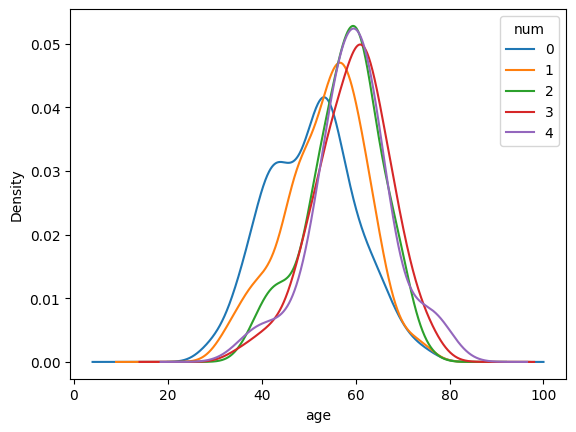

In [ ]:
#plot distribution of age by num
data.groupby('num')['age'].plot(kind='kde')

#add legend
plt.legend(['0', '1','2','3','4'], title='num')

#add x-axis label
plt.xlabel('age');

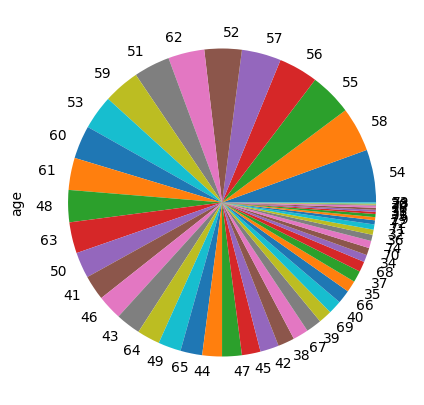

In [ ]:
#Number of individuals in each category
age=data['age'].value_counts()
age.plot(kind='pie',figsize=(10, 5));

The more you age, the higher the risk of having a heart disease, I think this is a reasonable conclusion and can be easily drawn from the pie chart above. But what about the distribution of the feature through the different classes? We decided to conduct this analysis to see if the variable acts different for the different heart disease types, and to see if it varies the same or not. This is crucial to determine whether the feature actually makes a difference in our dataset and impacts the distribution of our data. Here, we can conclude that age is a good feature to use, since the distributions for the different classes is visibly different ( class 0 is particularly different than others when age is concerned )

### **Dataset (place of study) Feature**

This feature represents the origin of the individuals. It contains 4 values : Cleveland, Hungary, Switzerland and VA Long Beach.

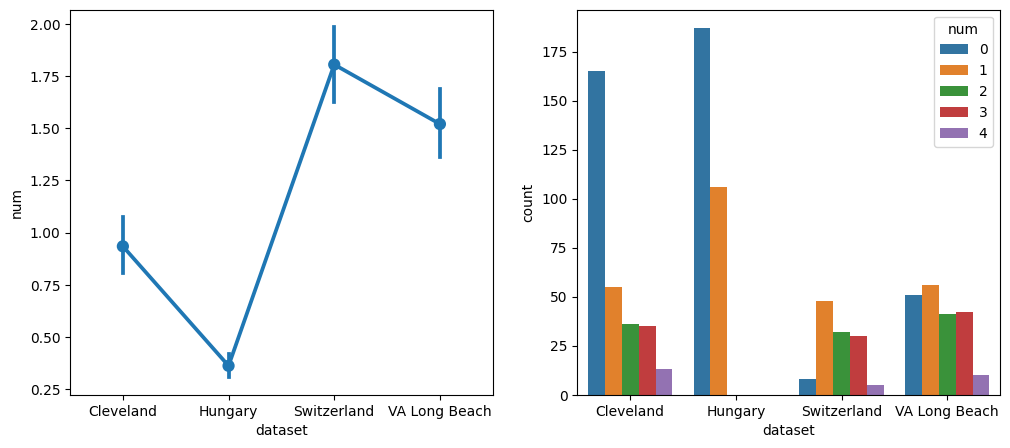

In [ ]:
#Data Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.pointplot(data=data, x="dataset", y="num", ax=ax1)
sns.countplot(data=data, x="dataset", hue="num", ax=ax2);

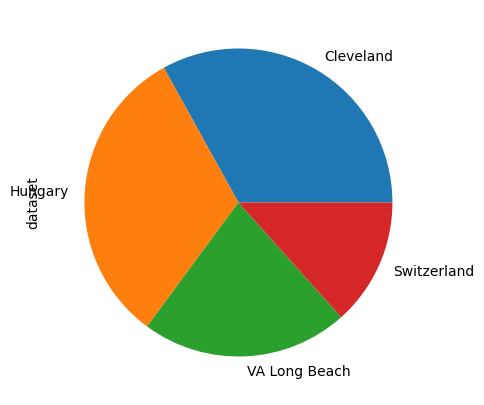

In [ ]:
#Number of individuals in each category
origin=data['dataset'].value_counts()
origin.plot(kind='pie',figsize=(10, 5));

According to the previous figures, we can conclude that the categories within our origin feature are somewhat balanced. When it comes to the distribution per heart disease types and patients count, we can see that contrary to Hungary and Clevland, the majority of swiss patients are diagnosed with heart disease. The origin feature seems to be relevant in our dataset and therefore we can include it in our model.

##### **Feature Encoding**

We're going to create dummy variables for the different regions as recommended.

In [ ]:
#Dummy variables for the dataset variable
dummy_df = pd.get_dummies(data['dataset'])
# concatenate dummy variables with original dataframe
data = pd.concat([data, dummy_df], axis=1);

In [ ]:
#Dropping the column dataset
data = data.drop('dataset', axis=1);

### **Cp ( Chest Pain) Feature**

This feature represents the chest pain for the individuals. It contains 4 values : typical angina, asymptomatic, non-anginal and atypical angina.

Angina is chest pain or discomfort that occurs when the heart muscle does not receive enough oxygen-rich blood. There are several types of angina, including typical angina, non-anginal chest pain, and atypical angina.

Typical angina: This is the most common type of angina and is characterized by a feeling of pressure, tightness, or a squeezing sensation in the chest that can spread to the neck, jaw, shoulders, back, or arms. This type of angina is often triggered by physical activity or emotional stress and is relieved by rest or medication. The pain usually lasts for a few minutes and goes away after the trigger is removed.

Non-anginal chest pain: This type of chest pain may be similar to typical angina, but is not caused by a lack of blood flow to the heart. Non-anginal chest pain can be caused by a variety of factors, including gastrointestinal problems, anxiety, or musculoskeletal issues. The pain may be sharp, stabbing, or burning and may last for several minutes or longer.

Atypical angina: This type of chest pain is similar to typical angina, but may have different or unusual symptoms. For example, atypical angina may cause shortness of breath, fatigue, nausea, or sweating in addition to chest pain. The pain may also occur during rest or after eating. Atypical angina can be caused by a variety of factors, including microvascular disease or spasm of the coronary arteries.

In terms of severity, typical angina is generally considered to be worse than non-anginal chest pain or atypical angina. This is because typical angina is often caused by a significant narrowing or blockage of one or more of the coronary arteries, which can increase the risk of a heart attack or other serious cardiac events.

Non-anginal chest pain and atypical angina, on the other hand, may be caused by a variety of factors that are not directly related to the heart, such as gastrointestinal problems or anxiety. While these types of chest pain can still be uncomfortable and disruptive to daily life, they are generally not considered to be as serious or life-threatening as typical angina.

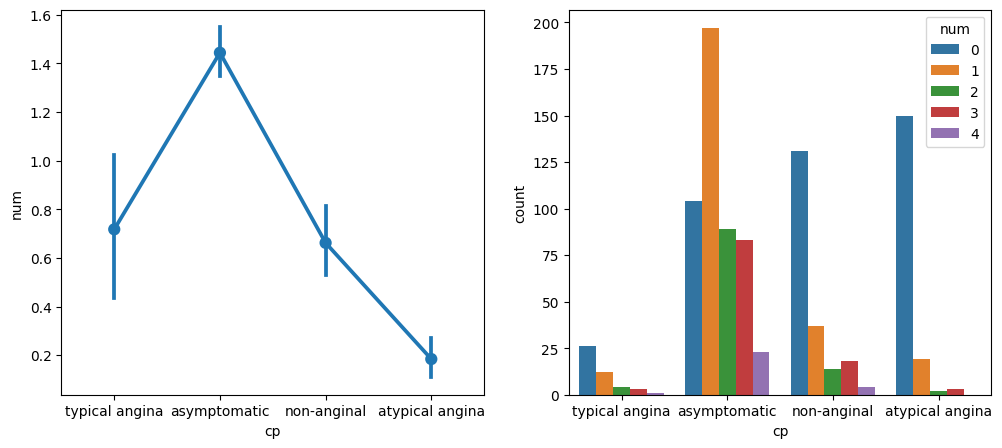

In [ ]:
#cp (Chest Pain Type)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.pointplot(data=data, x="cp", y="num", ax=ax1)
sns.countplot(data=data, x="cp", hue="num", ax=ax2);

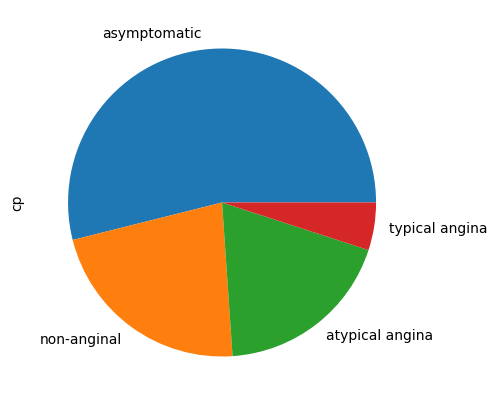

In [ ]:
#Number of individuals in each category
cp=data['cp'].value_counts()
cp.plot(kind='pie',figsize=(10, 5));

According to the interesting figures above, asymptomatic chest pain is the dominant category in this feature, accounting for over 50% of the samples. Interestingly, it's also the category with the most occurrences of all heart disease types. It has extreme high count of samples compared to the other categories. This can include a pattern in the data that's useful to discover by our model and extremely important to take into consideration. We're sometimes under the misconception that having no symptoms is equivalent to no disease, but as we can see here, it's almost completely the opposite. This is important because the adoption of ML in healthcare is too sensitive to misclassifications, we're dealing with lives, after all. Which is why it's important to take this feature into consideration and to explore the asymptomatic chest pain for the right diagnosis and classification.

##### **Feature Encoding**

In [ ]:
#Dummy variables for the cp variable
dummy_df = pd.get_dummies(data['cp'])
# concatenate dummy variables with original dataframe
data = pd.concat([data, dummy_df], axis=1)

Here we're dropping the column cp after creating the dummy variables that we are using as features so it's no longer needed.

In [ ]:
#Dropping the column cp
data = data.drop('cp', axis=1)

The majority of people with asymptomatic cp have heart disease.

### **Trestbps(Resting Blood Pressure) Feature**

This feature represents the resting blood pressure of the individuals. It contains values in the range [0:200]

The general categories of blood pressure according to the AHA:
- Normal blood pressure: less than 120/80 mm Hg
- Elevated blood pressure: systolic between 120-129 and diastolic less than 80 mm Hg
- High blood pressure stage 1: systolic between 130-139 or diastolic between 80-89 mm Hg
- High blood pressure stage 2: systolic of 140 or higher or diastolic of 90 or higher mm Hg
- Hypertensive crisis: systolic higher than 180 and/or diastolic higher than 120 mm Hg

The value 0 is very weird as having 0 for resting blood pressure can't happen.
We think that the value 0 is just a representation of a very low resting blood pressure rate which can affect the heart's condition.


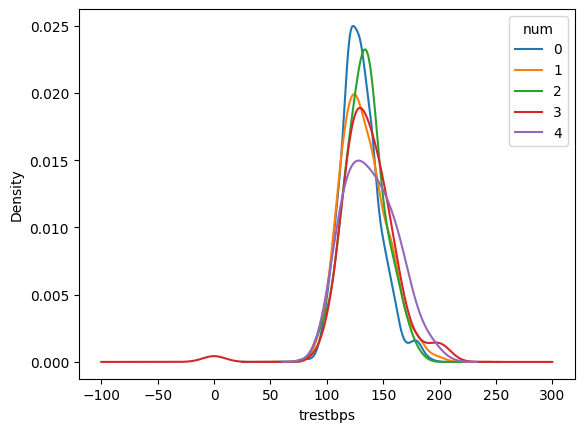

In [ ]:
#Data Distribution with missing values

#plot distribution of trestbps by num
data.groupby('num')['trestbps'].plot(kind='kde')

#add legend
plt.legend(['0', '1','2','3','4'], title='num')

#add x-axis label
plt.xlabel('trestbps');

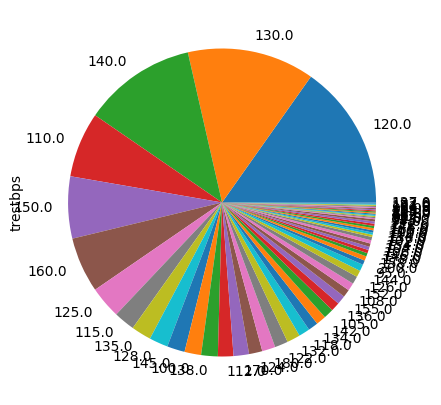

In [ ]:
trestbps=data['trestbps'].value_counts()
trestbps.plot(kind='pie',figsize=(10, 5));

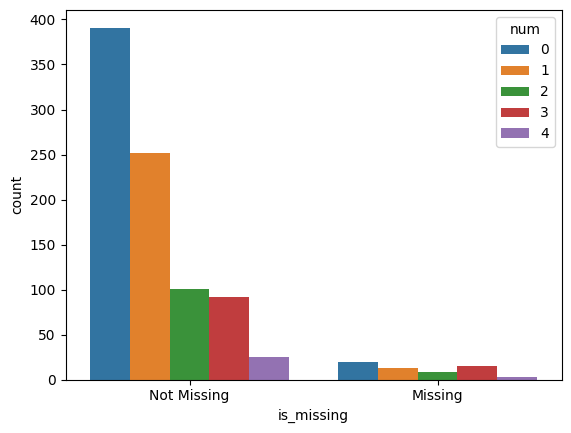

In [ ]:
data['is_missing'] = data['trestbps'].isnull()

# Plot the distribution of the target variable based on whether a value is missing or not
sns.countplot(x='is_missing', hue='num', data=data)
plt.xticks([0, 1], ['Not Missing', 'Missing'])
plt.legend(title='num')
plt.show();

Here we notice that we have few missing values in our data, through which we can't really spot why the data is missing. We also have a fairly the same data distribution for all classes when it comes to this feature and the density seems to peak simultaneously for the same value, nonetheless, there are still some differences worth exploring and we're thinking of re-training our model later without this feature to compare the performance and the results.

To replace our missing values, we've chose to work with a middle value that's present in the two biggest categories. It's always interesting, as we researched, to try and experiment with this method.

In [ ]:
#Replacing missing values
data["trestbps"].fillna(125, inplace = True)

In [ ]:
data.isnull().sum()/920

id                 0.000000
age                0.000000
trestbps           0.000000
chol               0.032609
fbs                0.097826
restecg            0.002174
thalch             0.059783
exang              0.059783
oldpeak            0.067391
slope              0.335870
ca                 0.664130
thal               0.528261
num                0.000000
Female             0.000000
Male               0.000000
Cleveland          0.000000
Hungary            0.000000
Switzerland        0.000000
VA Long Beach      0.000000
asymptomatic       0.000000
atypical angina    0.000000
non-anginal        0.000000
typical angina     0.000000
is_missing         0.000000
dtype: float64

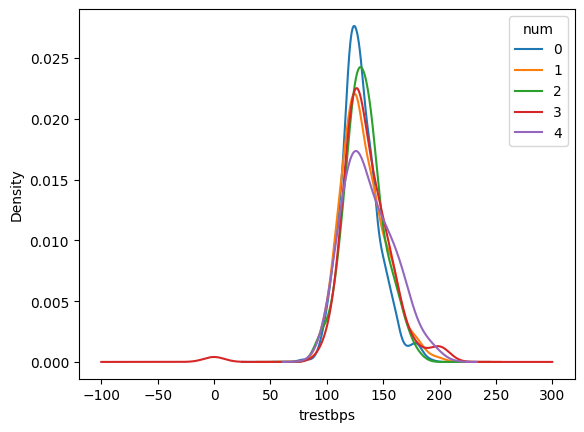

In [ ]:
#Data Distribution Without Missing Values

#plot distribution of trestbps by num
data.groupby('num')['trestbps'].plot(kind='kde')

#add legend
plt.legend(['0', '1','2','3','4'], title='num')

#add x-axis label
plt.xlabel('trestbps');

As seen here, we've fairly maintained the integrity of our initial distribution.

### **Chol ( Serum Cholesterol in mg/dl) Feature**

This feature represents the serum cholesterol for the individuals. It contains values in the range [0:603]

here are different types of cholesterol, including:

- Low-density lipoprotein (LDL) cholesterol: This is often referred to as "bad" cholesterol because high levels of LDL can contribute to the development of plaque in the arteries, which can lead to heart disease and stroke.

- High-density lipoprotein (HDL) cholesterol: This is often referred to as "good" cholesterol because it helps remove excess cholesterol from the bloodstream and can help protect against heart disease.

- Triglycerides: This is a type of fat that is found in the blood and can also contribute to the development of plaque in the arteries if levels are too high.

The recommended levels of cholesterol are:

- Total cholesterol: less than 200 mg/dL
- LDL cholesterol: less than 100 mg/dL (optimal) or less than 130 mg/dL (near optimal)
- HDL cholesterol: 60 mg/dL or higher (protective) or less than 40 mg/dL (low)
- Triglycerides: less than 150 mg/dL

The value 0 is very weird as the minimum cholesterol rate is 60
All the values <60 are 0
We think that the value 0 is just a representation of a very low cholesterol rate which can affect the heart's condition

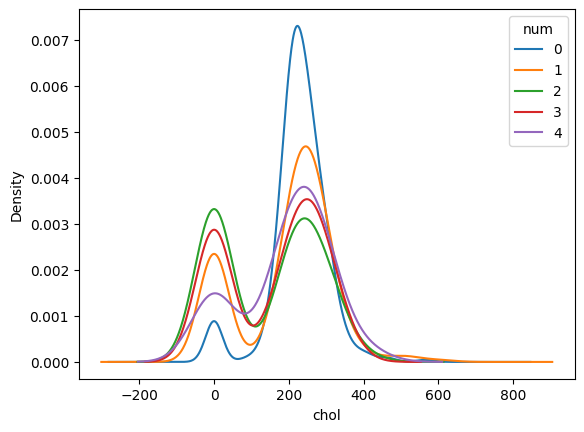

In [ ]:
#Data Distribution With Missing Values

#plot distribution of cholestrol by num
data.groupby('num')['chol'].plot(kind='kde')

#add legend
plt.legend(['0', '1','2','3','4'], title='num')

#add x-axis label
plt.xlabel('chol');

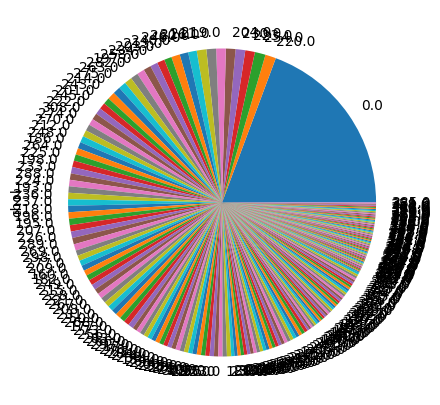

In [ ]:
chol=data['chol'].value_counts()
chol.plot(kind='pie',figsize=(10, 5));

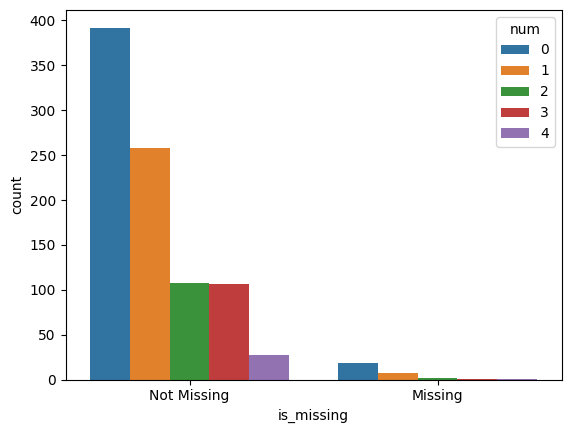

In [ ]:
data['is_missing'] = data['chol'].isnull()

# Plot the distribution of the target variable based on whether a value is missing or not
sns.countplot(x='is_missing', hue='num', data=data)
plt.xticks([0, 1], ['Not Missing', 'Missing'])
plt.legend(title='num')
plt.show();

Interestingly, there are few missing values, but almost zero in the more advanced categories, this calls for speculation in whether this feature is too important to diagnose and therefore register and note, especially in the categories where there is an extreme diagnosis of heart disease. The distribution is promising, after all, and it presents interesting and different variability when it comes to the different classes of our dataset. The pie chart is self-explanatory, but it shows an overwhelming presence of a 0 cholesterol dosage, which may reveal an interesting pattern in our data.

In [ ]:
data.groupby("num")["chol"].value_counts()

num  chol 
0    0.0      20
     220.0     8
     240.0     8
     211.0     7
     195.0     5
     196.0     5
     197.0     5
     201.0     5
     204.0     5
     209.0     5
     213.0     5
     215.0     5
     223.0     5
     245.0     5
     250.0     5
     308.0     5
     160.0     4
     182.0     4
     207.0     4
     214.0     4
     219.0     4
     224.0     4
     226.0     4
     227.0     4
     230.0     4
     234.0     4
     238.0     4
     243.0     4
     254.0     4
     260.0     4
     269.0     4
     271.0     4
     275.0     4
     175.0     3
     184.0     3
     198.0     3
     199.0     3
     208.0     3
     216.0     3
     221.0     3
     222.0     3
     233.0     3
     236.0     3
     246.0     3
     253.0     3
     263.0     3
     273.0     3
     277.0     3
     283.0     3
     295.0     3
     297.0     3
     298.0     3
     303.0     3
     147.0     2
     161.0     2
     163.0     2
     166.0     2
     168.0     2
   

To replace our missing values, we opted for the median, as it's most appropriate in our scenario where our cholesterol distribution isn't normally distributed and presents a large number of zeros that make the mean a bad option for imputation.

In [ ]:
#Replacing missing values
data["chol"].fillna(data["chol"].median(), inplace = True)

In [ ]:
data.isnull().sum()/920

id                 0.000000
age                0.000000
trestbps           0.000000
chol               0.000000
fbs                0.097826
restecg            0.002174
thalch             0.059783
exang              0.059783
oldpeak            0.067391
slope              0.335870
ca                 0.664130
thal               0.528261
num                0.000000
Female             0.000000
Male               0.000000
Cleveland          0.000000
Hungary            0.000000
Switzerland        0.000000
VA Long Beach      0.000000
asymptomatic       0.000000
atypical angina    0.000000
non-anginal        0.000000
typical angina     0.000000
is_missing         0.000000
dtype: float64

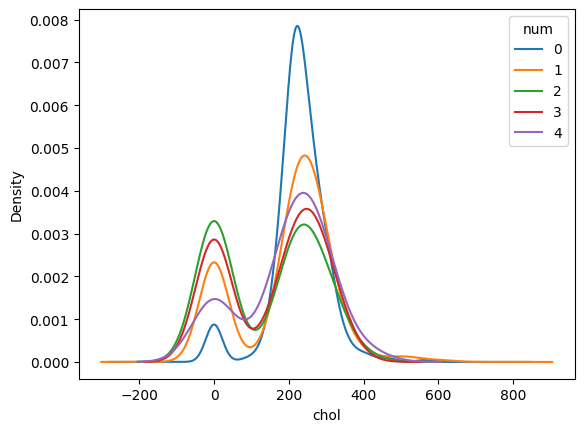

In [ ]:
#Data Distribution Without Missing Values

#plot distribution of cholestrol by num
data.groupby('num')['chol'].plot(kind='kde')

#add legend
plt.legend(['0', '1','2','3','4'], title='num')

#add x-axis label
plt.xlabel('chol');

The data distribution remained fairly the same after our modifications!

There is some evidence to suggest that extremely low levels of LDL cholesterol (often referred to as "bad" cholesterol) may be associated with an increased risk of heart disease, particularly in people who have a history of heart disease or who have other risk factors.

### **fbs ( Fasting Blood Sugar >120 mg/dl) Feature**

This feature measures if the fasting blood sugar is >120 mg/dl. It contains two values : True And False

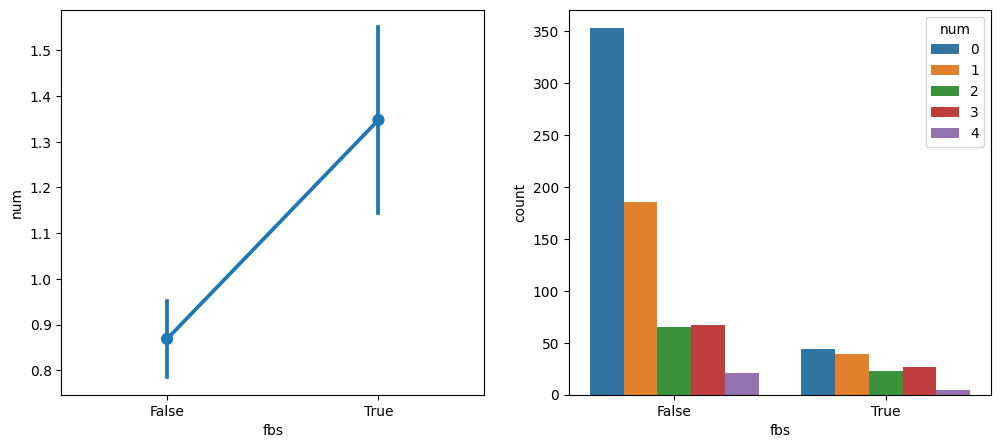

In [ ]:
#Data Distribution With Missing Values

#Data Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.pointplot(data=data, x="fbs", y="num", ax=ax1)
sns.countplot(data=data, x="fbs", hue="num", ax=ax2);

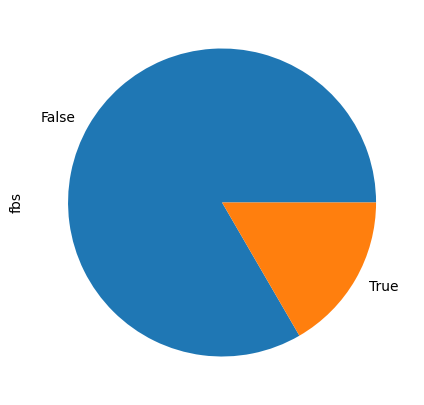

In [ ]:
#Number of individuals in each category
fbs=data['fbs'].value_counts()
fbs.plot(kind='pie',figsize=(10, 5));

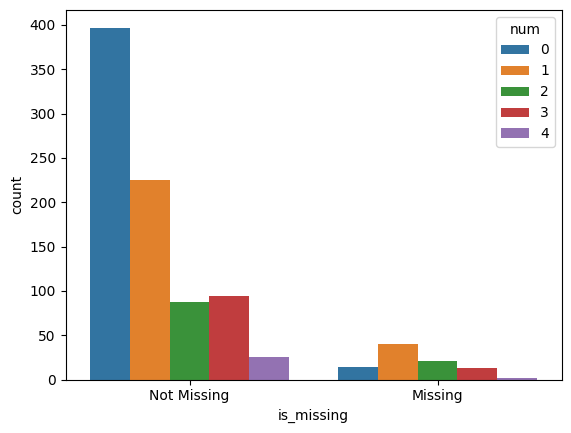

In [ ]:
data['is_missing'] = data['fbs'].isnull()

# Plot the distribution of the target variable based on whether a value is missing or not
sns.countplot(x='is_missing', hue='num', data=data)
plt.xticks([0, 1], ['Not Missing', 'Missing'])
plt.legend(title='num')
plt.show();

The majority of the patients have a false blood sugar, ie < 120 mg. There are some missing values here but the interesting point being that most ill patients don't have high blood sugars, so it looks like there's a pattern to explore here and a difference worth noting.

In [ ]:
data.groupby("num")["fbs"].value_counts()

num  fbs  
0    False    353
     True      44
1    False    186
     True      39
2    False     65
     True      23
3    False     67
     True      27
4    False     21
     True       5
Name: fbs, dtype: int64

Interestingly, it looks like the mode in this feature is False in all categories, so we're safely inputing missing values with False for all the different classes.

In [ ]:
#Replacing missing values
data["fbs"].fillna(False, inplace = True)

In [ ]:
data.isnull().sum()/920

id                 0.000000
age                0.000000
trestbps           0.000000
chol               0.000000
fbs                0.000000
restecg            0.002174
thalch             0.059783
exang              0.059783
oldpeak            0.067391
slope              0.335870
ca                 0.664130
thal               0.528261
num                0.000000
Female             0.000000
Male               0.000000
Cleveland          0.000000
Hungary            0.000000
Switzerland        0.000000
VA Long Beach      0.000000
asymptomatic       0.000000
atypical angina    0.000000
non-anginal        0.000000
typical angina     0.000000
is_missing         0.000000
dtype: float64

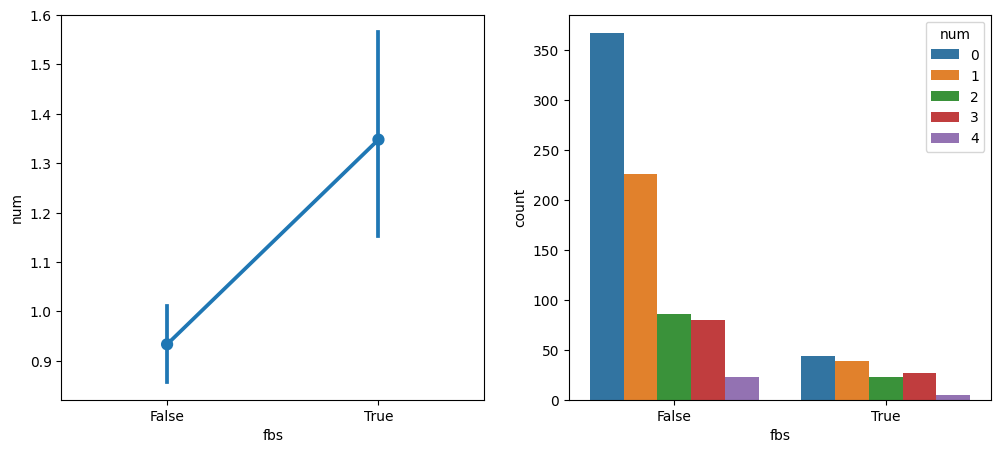

In [ ]:
#Data Distribution Without Missing Values
#Data Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.pointplot(data=data, x="fbs", y="num", ax=ax1)
sns.countplot(data=data, x="fbs", hue="num", ax=ax2);

#### **Feature Encoding**

In [ ]:
#creating the fbs column as integer
data["fbs"] = data["fbs"].map({True: 1, False : 0})

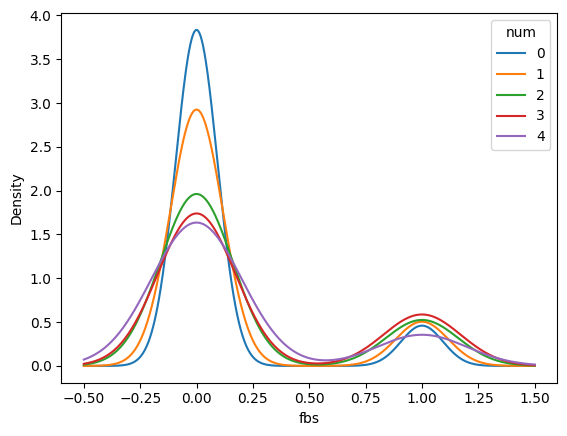

In [ ]:
#Data Distribution Without Missing Values

#plot distribution of cholestrol by num
data.groupby('num')['fbs'].plot(kind='kde')

#add legend
plt.legend(['0', '1','2','3','4'], title='num')

#add x-axis label
plt.xlabel('fbs');

As mentioned before, there's a variability worth exploring here across the different classes, as shown here after feature encoding!

fbs=true risk of having a heart disease (not important)
-class imbalance

### **restecg (resting electrocardiographic results) Feature**

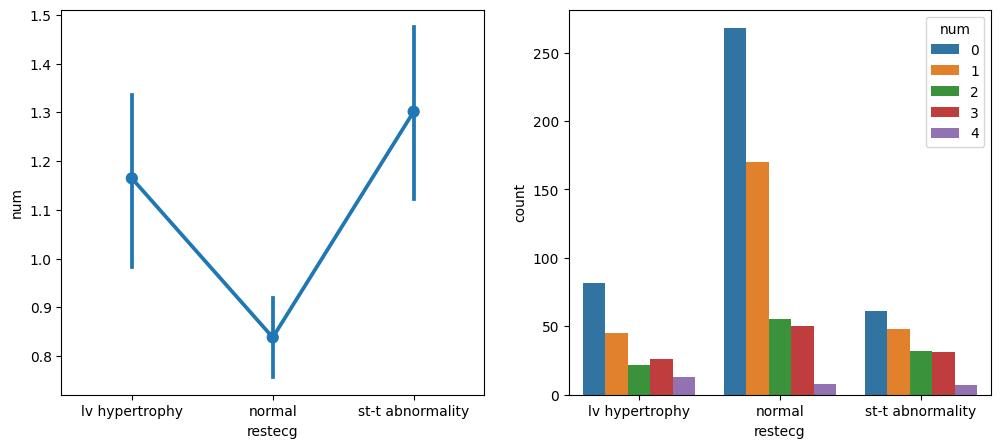

In [ ]:
#Data Distribution With Missing Values
#Data Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.pointplot(data=data, x="restecg", y="num", ax=ax1)
sns.countplot(data=data, x="restecg", hue="num", ax=ax2);

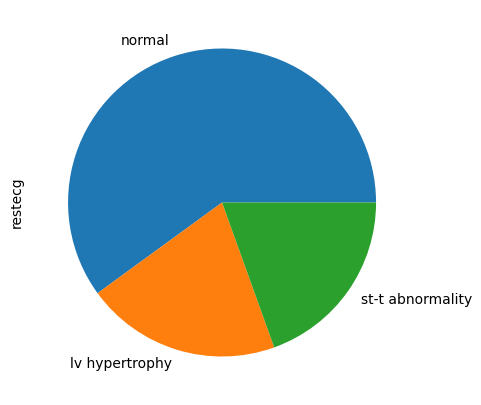

In [ ]:
#Number of individuals in each category
fbs=data['restecg'].value_counts()
fbs.plot(kind='pie',figsize=(10, 5));

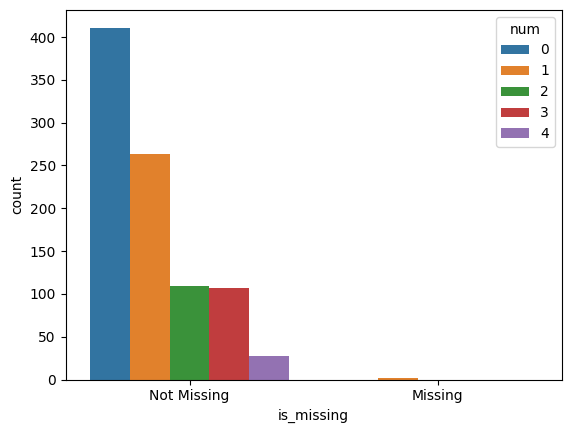

In [ ]:
data['is_missing'] = data['restecg'].isnull()

# Plot the distribution of the target variable based on whether a value is missing or not
sns.countplot(x='is_missing', hue='num', data=data)
plt.xticks([0, 1], ['Not Missing', 'Missing'])
plt.legend(title='num')
plt.show();

For the resting electrocardiographic results, luckiy it looks like we have the majority of our data present here! and it also looks like most patients have a normal restecg but also ill and presenting mostly type 1 heart disease. The samples count is obviously different for the different values which makes it an interesting feature to explore within our set of chosen features.

In [ ]:
data.groupby("num")["restecg"].value_counts()

num  restecg         
0    normal              268
     lv hypertrophy       82
     st-t abnormality     61
1    normal              170
     st-t abnormality     48
     lv hypertrophy       45
2    normal               55
     st-t abnormality     32
     lv hypertrophy       22
3    normal               50
     st-t abnormality     31
     lv hypertrophy       26
4    lv hypertrophy       13
     normal                8
     st-t abnormality      7
Name: restecg, dtype: int64

To replace our missing values, we're going in with our mode acroos all classes which is a normal restecg.

In [ ]:
#Replacing missing values
data["restecg"].fillna("normal", inplace = True)

In [ ]:
data.isnull().sum()/920

id                 0.000000
age                0.000000
trestbps           0.000000
chol               0.000000
fbs                0.000000
restecg            0.000000
thalch             0.059783
exang              0.059783
oldpeak            0.067391
slope              0.335870
ca                 0.664130
thal               0.528261
num                0.000000
Female             0.000000
Male               0.000000
Cleveland          0.000000
Hungary            0.000000
Switzerland        0.000000
VA Long Beach      0.000000
asymptomatic       0.000000
atypical angina    0.000000
non-anginal        0.000000
typical angina     0.000000
is_missing         0.000000
dtype: float64

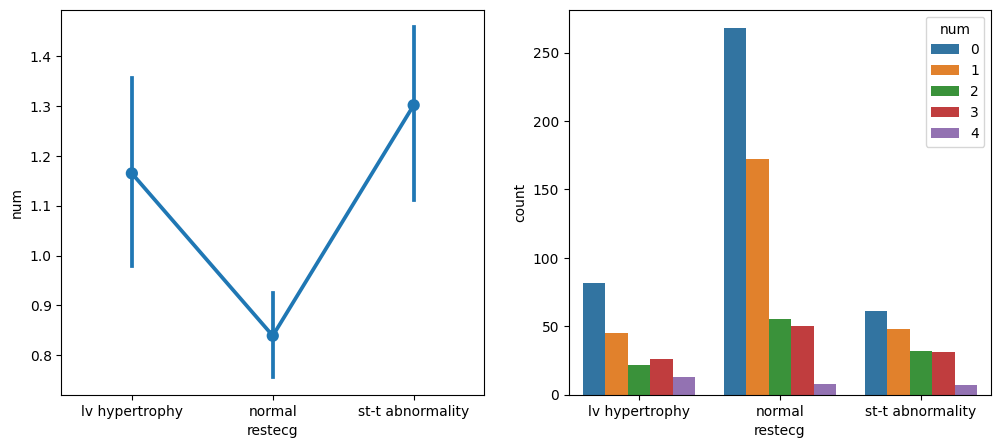

In [ ]:
#Data Distribution Without Missing Values
#Data Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.pointplot(data=data, x="restecg", y="num", ax=ax1)
sns.countplot(data=data, x="restecg", hue="num", ax=ax2);

In [ ]:
#creating the fbs column as integer
data["restecg"] = data["restecg"].map({"normal": 0, "st-t abnormality" : 1, "lv hypertrophy" : 2 })

In [ ]:
data.groupby("num")["restecg"].value_counts()

num  restecg
0    0          268
     2           82
     1           61
1    0          172
     1           48
     2           45
2    0           55
     1           32
     2           22
3    0           50
     1           31
     2           26
4    2           13
     0            8
     1            7
Name: restecg, dtype: int64

Both ST-T abnormalities and LV hypertrophy are signs of potential heart problems, and both can indicate a risk for developing cardiovascular disease. However, the severity of each condition can vary and depend on the underlying cause.

ST-T abnormalities are changes in the electrical activity of the heart, which can be seen on an electrocardiogram (ECG). These changes can be caused by a variety of factors, including myocardial ischemia (reduced blood flow to the heart), electrolyte imbalances, medication effects, and other conditions. While ST-T abnormalities can be concerning, they may not necessarily indicate a serious heart condition.

LV hypertrophy, on the other hand, refers to an enlargement or thickening of the heart's left ventricle, which can also be seen on an ECG or confirmed by an echocardiogram. This can be caused by conditions such as high blood pressure, aortic stenosis, or hypertrophic cardiomyopathy. LV hypertrophy can put additional strain on the heart and increase the risk of heart failure and other cardiovascular problems.

In summary, both ST-T abnormalities and LV hypertrophy can indicate a potential risk for heart problems, but the severity and implications of each condition can vary depending on the underlying cause and other factors. It is important to discuss any abnormal ECG findings or concerns with a healthcare professional.

### **thalch ( maximum heart rate achieved)  Feature**

This feature measures the maximum heart rate achieved for the individuals. It contains values in the range [60:202]

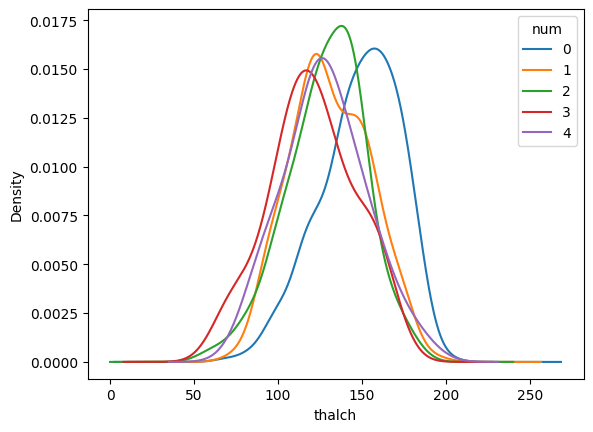

In [ ]:
#plot distribution of points by team
data.groupby('num')['thalch'].plot(kind='kde')

#add legend
plt.legend(['0', '1','2','3','4'], title='num')

#add x-axis label
plt.xlabel('thalch');

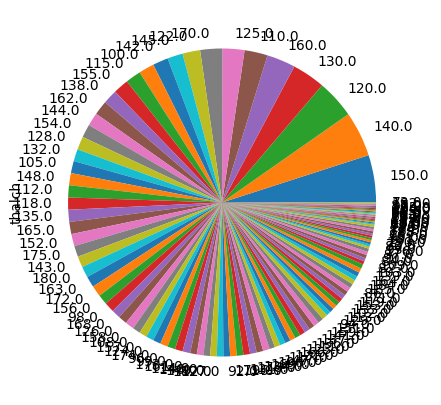

In [ ]:
thalch=data['thalch'].value_counts()
thalch.plot(kind='pie',figsize=(10, 5));

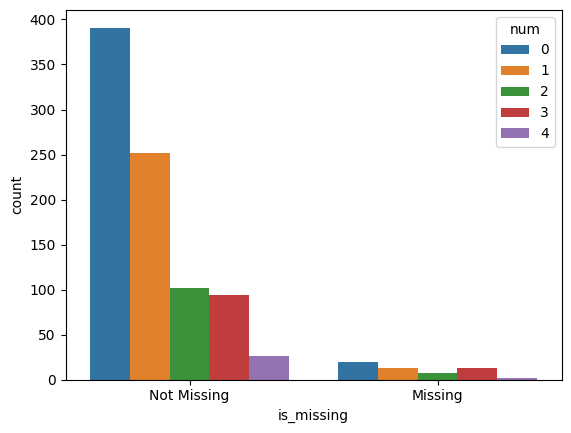

In [ ]:
data['is_missing'] = data['thalch'].isnull()

# Plot the distribution of the target variable based on whether a value is missing or not
sns.countplot(x='is_missing', hue='num', data=data)
plt.xticks([0, 1], ['Not Missing', 'Missing'])
plt.legend(title='num')
plt.show();

Looking into the figures below, the distribution of this variable according to the different classes is different, and therefore worth exploring as a feature. through the pie chart, we realised that we're dealing with a plethora of different values that are extremely different. when it comes to the missing values, we can't really spot a pattern in which they're missing, it looks like only a minority of samples is missing and it doesn't really gives us much information about the reasons why. We tried to research algorithms or methods to truly know if a missing value is either MCAR, MNAR, or MAR, but the results confirmed that it takes actual investigation in the way data was collected and there isn't really a solid yes or no answer to our dilemma.

In [ ]:
data.groupby("num")["thalch"].value_counts()

num  thalch
0    150.0     20
     160.0     20
     140.0     18
     170.0     14
     120.0     11
     172.0     10
     130.0      9
     142.0      9
     162.0      9
     138.0      8
     152.0      8
     155.0      8
     165.0      8
     180.0      8
     110.0      7
     154.0      7
     163.0      7
     175.0      7
     100.0      6
     148.0      6
     168.0      6
     178.0      6
     179.0      6
     122.0      5
     135.0      5
     137.0      5
     144.0      5
     145.0      5
     151.0      5
     173.0      5
     174.0      5
     115.0      4
     116.0      4
     118.0      4
     125.0      4
     132.0      4
     143.0      4
     157.0      4
     158.0      4
     161.0      4
     169.0      4
     182.0      4
     184.0      4
     185.0      4
     96.0       3
     114.0      3
     128.0      3
     131.0      3
     146.0      3
     156.0      3
     159.0      3
     164.0      3
     171.0      3
     86.0       2
     98.0       

One important question that needs to be raised here, is that do we impute with the mode of all classes? or class-specific modes? Well, it turns out that imputing  the missing values with the mode of each class can help preserve the distribution of the data within each class and avoid bias towards the most common category. This approach is known as **class-specific mode imputation**.

Class-specific mode imputation can be implemented by computing the mode of each categorical variable within each class separately and imputing missing values with the corresponding mode of each class. This approach can help ensure that the imputed values reflect the distribution of the data within each class and can improve the accuracy of the classification model. Here we can impute the missing values with the most common maximum heart rate achieved in each category.

In [ ]:
#Replacing missing values

#for each class we change by its mean
mode_thalch = data.groupby('num')['thalch'].apply(lambda x: x.mode()[0])

# replace missing values in the 'thalch' column with the median of each class
data['thalch'] = data.apply(lambda x: x['thalch'] if pd.notna(x['thalch']) else mode_thalch[x['num']], axis=1)


In [ ]:
data.isnull().sum()/920

id                 0.000000
age                0.000000
trestbps           0.000000
chol               0.000000
fbs                0.000000
restecg            0.000000
thalch             0.000000
exang              0.059783
oldpeak            0.067391
slope              0.335870
ca                 0.664130
thal               0.528261
num                0.000000
Female             0.000000
Male               0.000000
Cleveland          0.000000
Hungary            0.000000
Switzerland        0.000000
VA Long Beach      0.000000
asymptomatic       0.000000
atypical angina    0.000000
non-anginal        0.000000
typical angina     0.000000
is_missing         0.000000
dtype: float64

### **exang (exercise-induced angina) Feature**

This feature represents whether exercise-induced angina exists for the individuals. It contains two values : False and True.

Exercise-induced angina is a type of chest pain that occurs during physical activity or exertion, such as exercise. It is caused by a temporary decrease in blood flow to the heart muscle, which is not able to receive enough oxygen and nutrients to function properly. This reduced blood flow and oxygen supply to the heart muscle can cause a feeling of tightness or discomfort in the chest.

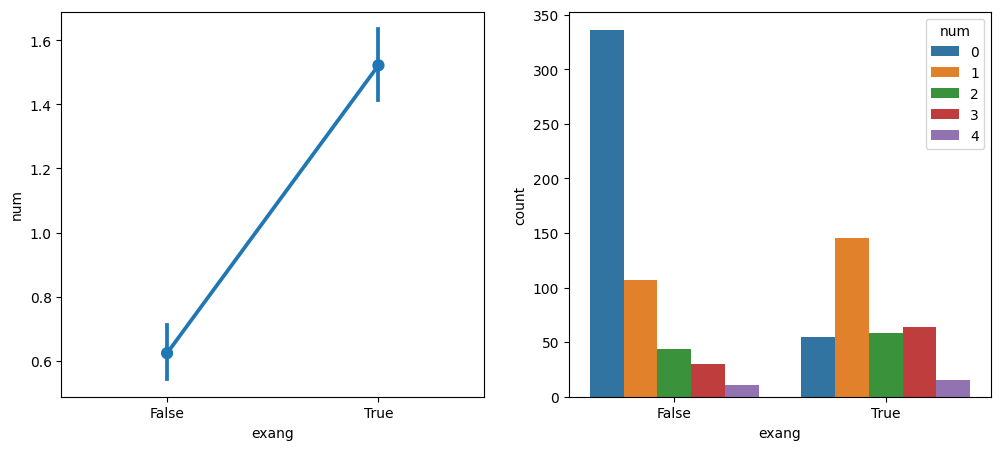

In [ ]:
#Data Distribution With Missing Values
#Data Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.pointplot(data=data, x="exang", y="num", ax=ax1)
sns.countplot(data=data, x="exang", hue="num", ax=ax2);

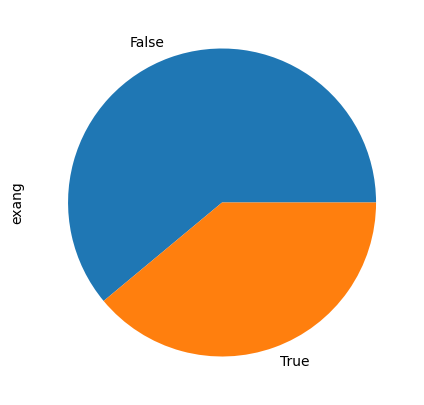

In [ ]:
#Number of individuals in each category
fbs=data['exang'].value_counts()
fbs.plot(kind='pie',figsize=(10, 5));

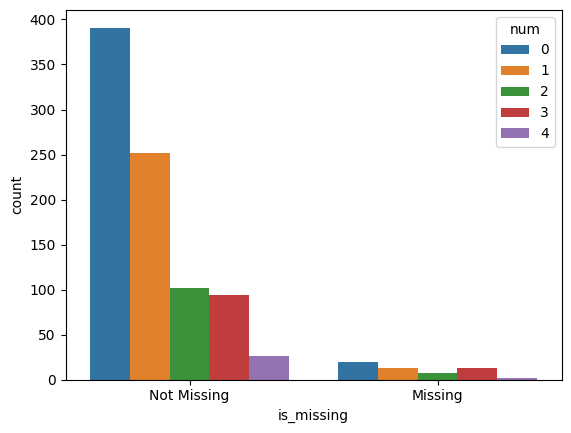

In [ ]:
data['is_missing'] = data['exang'].isnull()

# Plot the distribution of the target variable based on whether a value is missing or not
sns.countplot(x='is_missing', hue='num', data=data)
plt.xticks([0, 1], ['Not Missing', 'Missing'])
plt.legend(title='num')
plt.show();

Here, the majority of patients don't report chest pain while exercising ( over half the samples in the dataset ). It was predictable, as you can see in the cell below, that for " no heart disease " diagnosis, the vast majority of the patients don't have chest pain while exercising, and it's the complete opposite for all the other heart disease stages where there are more ill patients with this type of symptom, it's therefore a good feature that is presented differently in the different classes.

In [ ]:
data.groupby("num")["exang"].value_counts()

num  exang
0    False    336
     True      55
1    True     145
     False    107
2    True      58
     False     44
3    True      64
     False     30
4    True      15
     False     11
Name: exang, dtype: int64

To replace the few missing values here, we're once again imputing with the class-specific mode.

In [ ]:
#Replacing missing values

#for each class we change by its mode
mode_thalch = data.groupby('num')['exang'].apply(lambda x: x.mode()[0])

# replace missing values in the 'thalch' column with the mode of each class
data['exang'] = data.apply(lambda x: x['exang'] if pd.notna(x['exang']) else mode_thalch[x['num']], axis=1)


##### **Feature Encoding**

Here we're simply mapping the values to 0's and 1's.

In [ ]:
#Changing the exang column into an integer column
data["exang"] = data["exang"].map({False : 0, True : 1})

In [ ]:
data.isnull().sum()/920

id                 0.000000
age                0.000000
trestbps           0.000000
chol               0.000000
fbs                0.000000
restecg            0.000000
thalch             0.000000
exang              0.000000
oldpeak            0.067391
slope              0.335870
ca                 0.664130
thal               0.528261
num                0.000000
Female             0.000000
Male               0.000000
Cleveland          0.000000
Hungary            0.000000
Switzerland        0.000000
VA Long Beach      0.000000
asymptomatic       0.000000
atypical angina    0.000000
non-anginal        0.000000
typical angina     0.000000
is_missing         0.000000
dtype: float64

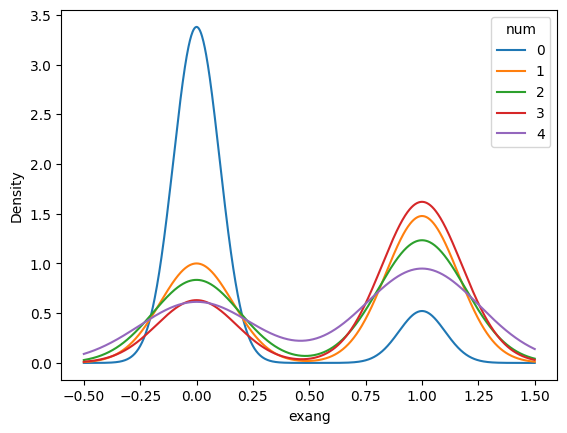

In [ ]:
#plot distribution of points by team
data.groupby('num')['exang'].plot(kind='kde')

#add legend
plt.legend(['0', '1','2','3','4'], title='num')

#add x-axis label
plt.xlabel('exang');

As suspected earlier, there is a good variability of the feature in relation to the different classes, mainly with the first class compared to the rest.

### **oldpeak (ST depression induced by exercise relative to rest) Feature**

This feature represents the ST depression induced by exercise relative to rest for the individuals. It contains values in the range [-2.6:6.2]

During exercise, the heart requires more oxygen and nutrients, which increases its workload. If the blood supply to the heart is restricted due to narrowed or blocked coronary arteries, the heart muscle may not receive enough oxygen, leading to a temporary reduction in blood flow and a decrease in the ST segment. This is known as ST depression.

ST depression induced by exercise relative to rest can be an important diagnostic tool for identifying coronary artery disease (CAD), as it indicates that the heart is not receiving enough blood supply during exercise. A greater degree of ST depression is generally associated with more severe coronary artery disease.

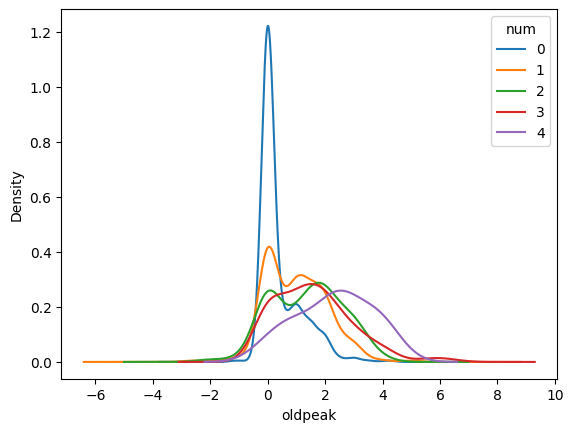

In [ ]:
#Data Distribution With Missing Values

#plot distribution of points by team
data.groupby('num')['oldpeak'].plot(kind='kde')

#add legend
plt.legend(['0', '1','2','3','4'], title='num')

#add x-axis label
plt.xlabel('oldpeak');

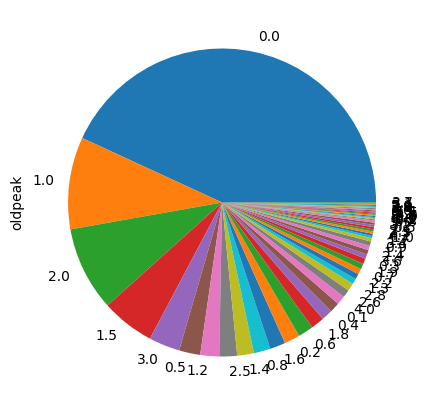

In [ ]:
#Number of individuals in each category
fbs=data['oldpeak'].value_counts()
fbs.plot(kind='pie',figsize=(10, 5));

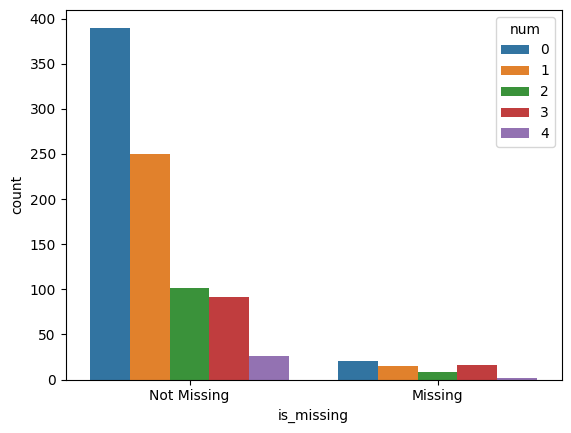

In [ ]:
data['is_missing'] = data['oldpeak'].isnull()

# Plot the distribution of the target variable based on whether a value is missing or not
sns.countplot(x='is_missing', hue='num', data=data)
plt.xticks([0, 1], ['Not Missing', 'Missing'])
plt.legend(title='num')
plt.show();

As stated in the feature definion, A greater degree of ST depression is generally associated with more severe coronary artery disease, this is why we can clearly see a peak of the " no heart disease " diagnosis for the value zero in the data distribution, indicating a very low degree of ST depression, associated with healthy patients. As for the missing values, they're very few compared to the values present in our dataset which are dominated by a value of 0 in correlation with the first class dominance.

In [ ]:
data.groupby("num")["oldpeak"].value_counts()

num  oldpeak
0     0.0       245
      1.0        26
      2.0        14
      1.5        11
      0.2        10
      0.6        10
      0.4         8
      0.8         8
      1.6         8
      0.5         7
      1.2         7
      1.4         6
      0.1         4
      1.8         3
      3.0         3
      0.3         2
      0.7         2
      1.1         2
      1.3         2
      1.9         2
      2.3         2
     -1.1         1
     -0.5         1
     -0.1         1
      0.9         1
      2.4         1
      2.6         1
      3.5         1
      4.2         1
1     0.0        78
      1.0        36
      2.0        30
      1.5        22
      3.0        10
      0.5         6
      1.8         6
      2.5         6
      0.8         5
      1.4         4
      0.2         3
      0.6         3
      0.7         3
      1.2         3
      1.3         3
      0.1         2
      0.3         2
      0.4         2
      1.1         2
      1.6         2
      1

As seen in the histograms above, oldpeak is a positively skewed variable and its missing values are therfore to be replaced by the median.

In [ ]:
#Replacing missing values
data["oldpeak"].fillna(data["oldpeak"].median(), inplace = True)

In [ ]:
data.isnull().sum()/920

id                 0.000000
age                0.000000
trestbps           0.000000
chol               0.000000
fbs                0.000000
restecg            0.000000
thalch             0.000000
exang              0.000000
oldpeak            0.000000
slope              0.335870
ca                 0.664130
thal               0.528261
num                0.000000
Female             0.000000
Male               0.000000
Cleveland          0.000000
Hungary            0.000000
Switzerland        0.000000
VA Long Beach      0.000000
asymptomatic       0.000000
atypical angina    0.000000
non-anginal        0.000000
typical angina     0.000000
is_missing         0.000000
dtype: float64

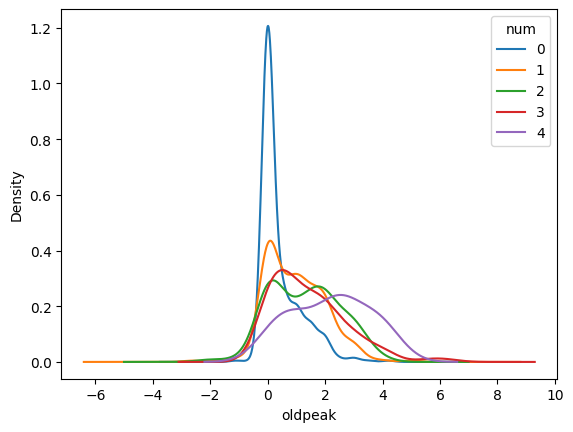

In [ ]:
#Data Distribution Without Missing Values

#plot distribution of points by team
data.groupby('num')['oldpeak'].plot(kind='kde')

#add legend
plt.legend(['0', '1','2','3','4'], title='num')

#add x-axis label
plt.xlabel('oldpeak');

This is the new data distribution, and I think it's safe to say that we succeeded in preserving the initial data distribution seen above.

ST segment depression is a common finding during exercise stress testing and is often used as an indicator of myocardial ischemia, which occurs when the heart muscle doesn't get enough oxygen-rich blood.
This can be a sign of underlying heart disease, such as coronary artery disease, which is a narrowing or blockage of the blood vessels that supply blood to the heart muscle.

### **Slope Feature**

This feature represents the slope of the peak exercise ST segment. It contains three values : downsloping , flat and upsloping.

The pattern of the ST segment on an electrocardiogram (ECG) during exercise stress testing can provide important information about the presence of heart disease.

Upsloping ST segment depression during exercise stress testing is generally considered a non-specific finding and is not commonly used to diagnose heart disease.

Flat or horizontal ST segment depression during exercise stress testing is more significant and may indicate the presence of heart disease, particularly if it occurs in multiple leads or is accompanied by symptoms such as chest discomfort or shortness of breath.

Downsloping ST segment depression during exercise stress testing is the most specific and sensitive indicator of heart disease, particularly if it occurs in multiple leads or is accompanied by symptoms. Therefore, downsloping ST segment depression is considered a more reliable indicator of coronary artery disease compared to upsloping or flat ST segment depression.

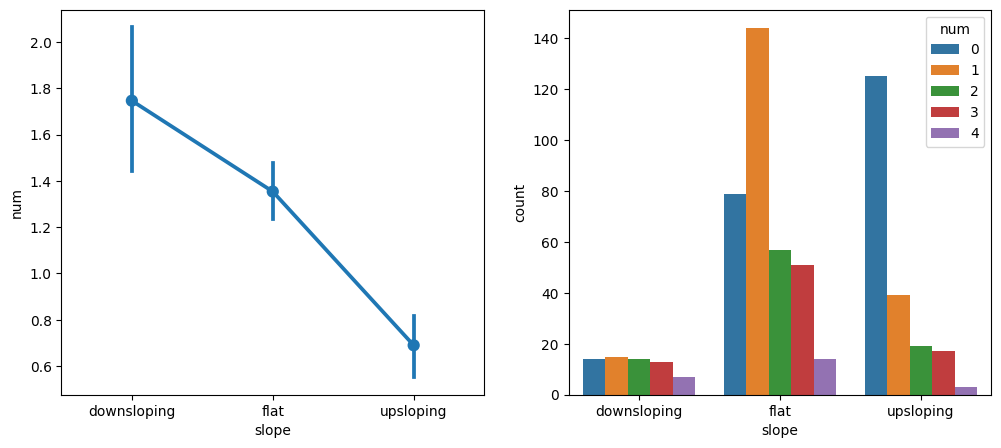

In [ ]:
#Data Distribution With Missing Values
#Data Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.pointplot(data=data, x="slope", y="num", ax=ax1)
sns.countplot(data=data, x="slope", hue="num", ax=ax2);

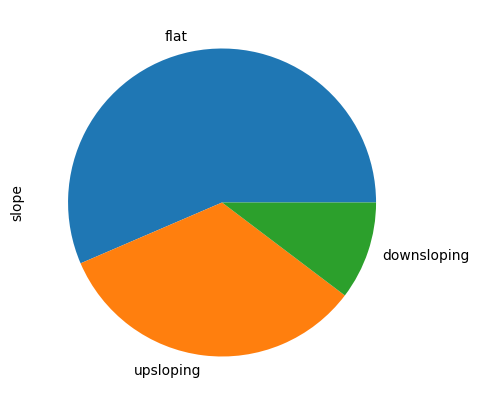

In [ ]:
#Number of individuals in each category
fbs=data['slope'].value_counts()
fbs.plot(kind='pie',figsize=(10, 5));

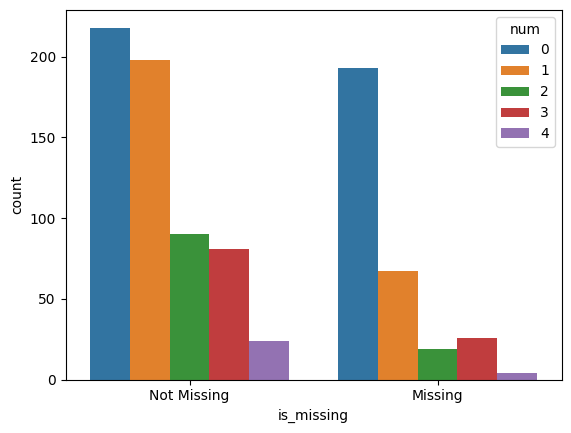

In [ ]:
data['is_missing'] = data['slope'].isnull()

# Plot the distribution of the target variable based on whether a value is missing or not
sns.countplot(x='is_missing', hue='num', data=data)
plt.xticks([0, 1], ['Not Missing', 'Missing'])
plt.legend(title='num')
plt.show();

As detailed in the figures and supported by our research, flat sloping is a great indicator of heart disease, as it caracterizes the majority of ill patients in comparison to the other values. Interestingly, downsloping is the one with least occurences of no heart disease diagnosis, which further validates its seriousness and almost the majority of patients with downsloping are ill. When it comes to the missing values, there are a lot of them present in this feature, but this feature is also promising we can't possibly dismiss it, so data imputation it is!

In [ ]:
data.groupby("num")["slope"].value_counts()

num  slope      
0    upsloping      125
     flat            79
     downsloping     14
1    flat           144
     upsloping       39
     downsloping     15
2    flat            57
     upsloping       19
     downsloping     14
3    flat            51
     upsloping       17
     downsloping     13
4    flat            14
     downsloping      7
     upsloping        3
Name: slope, dtype: int64

In [ ]:
#Replacing missing values

#for each class we change by its mode
mode_thalch = data.groupby('num')['slope'].apply(lambda x: x.mode()[0])

# replace missing values in the 'slope' column with the mode of each class
data['slope'] = data.apply(lambda x: x['slope'] if pd.notna(x['slope']) else mode_thalch[x['num']], axis=1)


We figured that class-specific mode imputation is the most appropriate for this case again, as we're mainly dealing with a categorical feature.

In [ ]:
data.isnull().sum()/920

id                 0.000000
age                0.000000
trestbps           0.000000
chol               0.000000
fbs                0.000000
restecg            0.000000
thalch             0.000000
exang              0.000000
oldpeak            0.000000
slope              0.000000
ca                 0.664130
thal               0.528261
num                0.000000
Female             0.000000
Male               0.000000
Cleveland          0.000000
Hungary            0.000000
Switzerland        0.000000
VA Long Beach      0.000000
asymptomatic       0.000000
atypical angina    0.000000
non-anginal        0.000000
typical angina     0.000000
is_missing         0.000000
dtype: float64

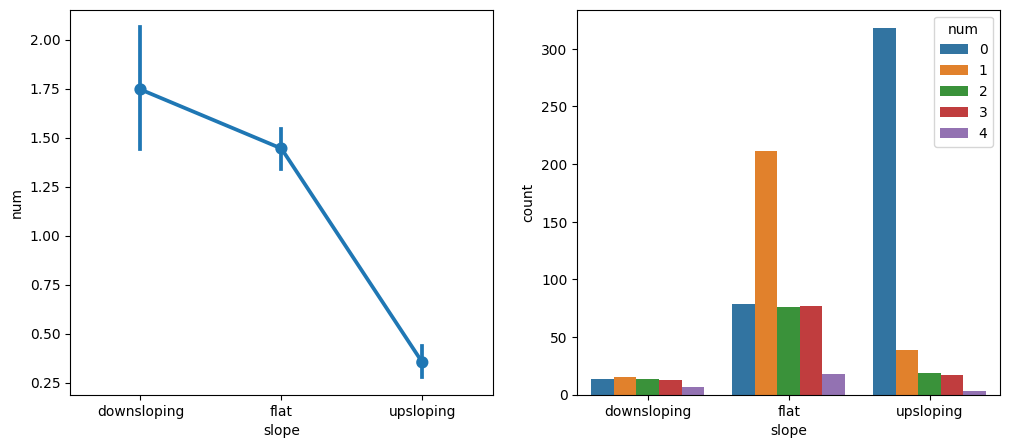

In [ ]:
#Data Distribution Without Missing Values
#Data Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.pointplot(data=data, x="slope", y="num", ax=ax1)
sns.countplot(data=data, x="slope", hue="num", ax=ax2);

##### **Feature Encoding**

In [ ]:
#creating the slope column as integer
data["slope"] = data["slope"].map({"upsloping": 0, "flat" : 1,"downsloping" : 2})

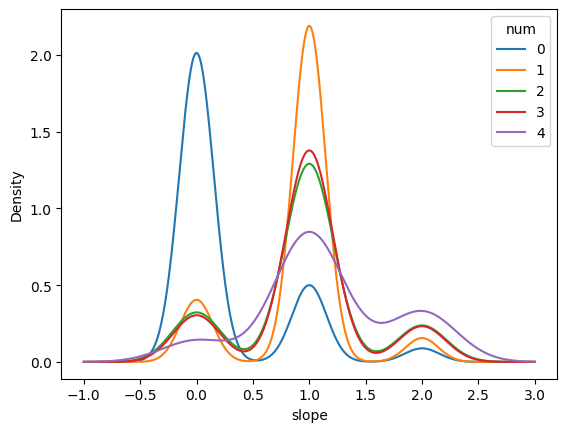

In [ ]:
#plot distribution of points by team
data.groupby('num')['slope'].plot(kind='kde')

#add legend
plt.legend(['0', '1','2','3','4'], title='num')

#add x-axis label
plt.xlabel('slope');

As speculated beforehand, this is a very interesting feature to observe!

### **Ca Feature**

This feature represents the number of major vessels colored by fluoroscopy for the individuals. It contains three values : 0,1 and 2.

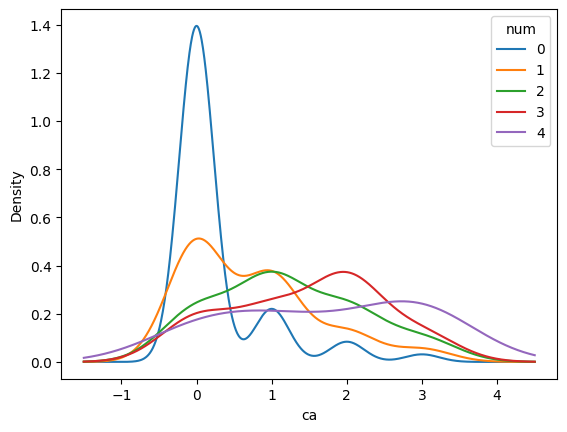

In [ ]:
#Data Distribution With Missing Values
#plot distribution of points by team
data.groupby('num')['ca'].plot(kind='kde')

#add legend
plt.legend(['0', '1','2','3','4'], title='num')

#add x-axis label
plt.xlabel('ca');

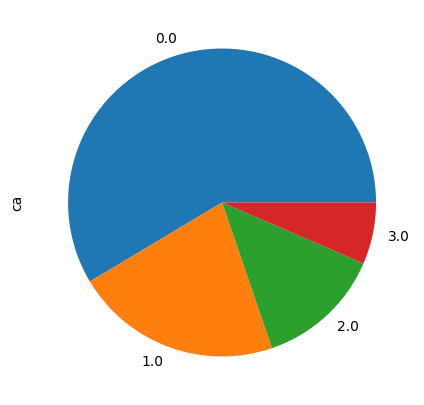

In [ ]:
#Number of individuals in each category
ca=data['ca'].value_counts()
ca.plot(kind='pie',figsize=(10, 5));

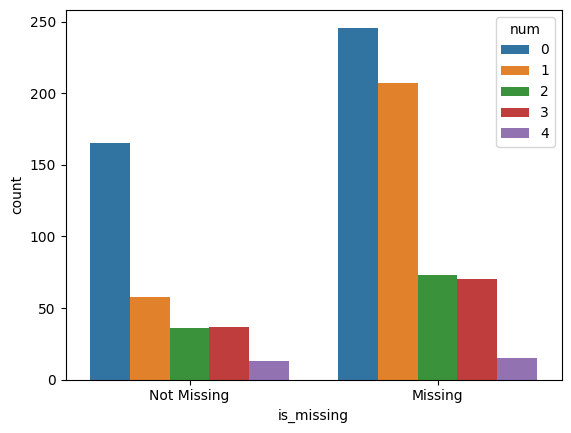

In [ ]:
data['is_missing'] = data['ca'].isnull()

# Plot the distribution of the target variable based on whether a value is missing or not
sns.countplot(x='is_missing', hue='num', data=data)
plt.xticks([0, 1], ['Not Missing', 'Missing'])
plt.legend(title='num')
plt.show();

As we move forward with our analysis, it seems like the most determining factors or those with a great variability ( class-sensitive ) are those with more missing values as seen here. This can maybe be due to the other features being broad and general and done always as first diagnosis techniques, so it's predictable that they're always registered, these last few features, for instance, are more detailed procedures. The distribution above shows a very interesting variability across classes and promises great value-added information, here the 0 number of major vessels is optimal for the first class, contrary to the rest of the classes that are often associated with one or more major colored vessels.

In [ ]:
data.groupby("num")["ca"].value_counts()

num  ca 
0    0.0    133
     1.0     21
     2.0      8
     3.0      3
1    0.0     28
     1.0     20
     2.0      7
     3.0      3
2    1.0     14
     0.0      9
     2.0      9
     3.0      4
3    2.0     15
     1.0      9
     0.0      8
     3.0      5
4    3.0      5
     0.0      3
     1.0      3
     2.0      2
Name: ca, dtype: int64

To replace the missing values in this feature, we did a combination of mean calculations.

In [ ]:
#Replacing Missing Values
data.loc[(data['num'] == 0) & (data['ca'].isnull()), 'ca'] = 0
data.loc[(data['num'] == 1) & (data['ca'].isnull()), 'ca'] = 0.5
data.loc[(data['num'] == 2) & (data['ca'].isnull()), 'ca'] = 1.5
data.loc[(data['num'] == 3) & (data['ca'].isnull()), 'ca'] = 1.5
data.loc[(data['num'] == 4) & (data['ca'].isnull()), 'ca'] = 3

In [ ]:
data.isnull().sum()/920

id                 0.000000
age                0.000000
trestbps           0.000000
chol               0.000000
fbs                0.000000
restecg            0.000000
thalch             0.000000
exang              0.000000
oldpeak            0.000000
slope              0.000000
ca                 0.000000
thal               0.528261
num                0.000000
Female             0.000000
Male               0.000000
Cleveland          0.000000
Hungary            0.000000
Switzerland        0.000000
VA Long Beach      0.000000
asymptomatic       0.000000
atypical angina    0.000000
non-anginal        0.000000
typical angina     0.000000
is_missing         0.000000
dtype: float64

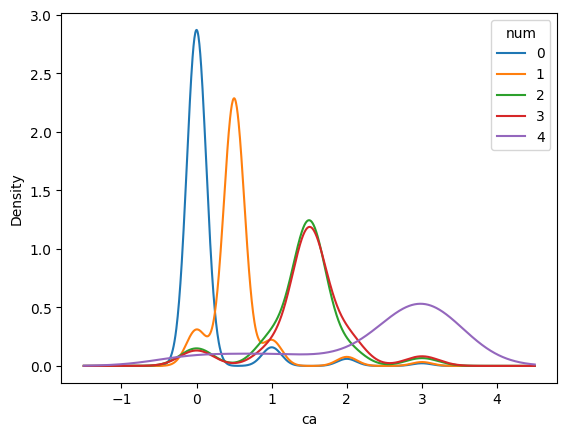

In [ ]:
#Data Distribution Without Missing Values
#plot distribution of points by team
data.groupby('num')['ca'].plot(kind='kde')

#add legend
plt.legend(['0', '1','2','3','4'], title='num')

#add x-axis label
plt.xlabel('ca');

### **thal Feature**

This feature represents the results of nuclear stress test for the individuals. It contains three values : fixed defect, normal and reverseble defect.
In a normal nuclear stress test, the tracer is evenly distributed throughout the heart muscle, indicating normal blood flow.

A fixed defect on a nuclear stress test indicates an area of the heart muscle where the tracer is not distributed evenly, which suggests an area of the heart muscle that has been permanently damaged or scarred due to a past heart attack or other injury.

A reversible defect on a nuclear stress test indicates an area of the heart muscle where the tracer is not distributed evenly during exercise, but returns to normal distribution during rest.

In the context of heart disease, a fixed defect is generally considered to be worse than a reversible defect.

A fixed defect refers to a heart defect or damage that cannot be reversed or repaired, such as scar tissue from a previous heart attack or a congenital heart defect. These types of defects can lead to long-term damage and can increase the risk of future heart problems, such as heart failure or arrhythmias.

On the other hand, a reversible defect refers to a heart defect or damage that can be treated or improved, such as blockages in the coronary arteries that can be opened with angioplasty or stenting. These types of defects can be addressed with medical intervention and can potentially improve heart function and reduce the risk of future heart problems.

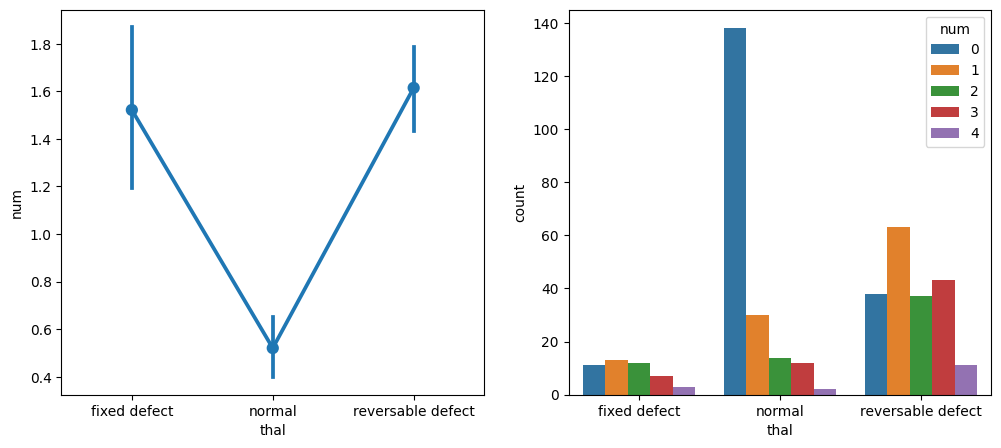

In [ ]:
#Data Distribution With Missing Values
#Data Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.pointplot(data=data, x="thal", y="num", ax=ax1)
sns.countplot(data=data, x="thal", hue="num", ax=ax2);

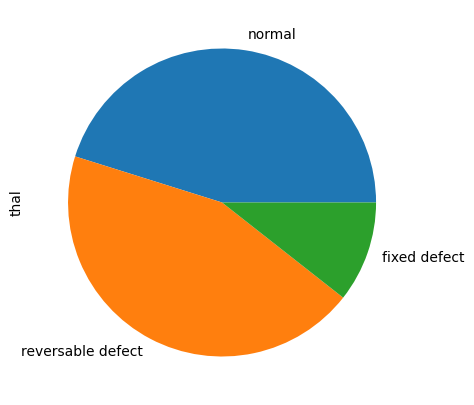

In [ ]:
#Number of individuals in each category
ca=data['thal'].value_counts()
ca.plot(kind='pie',figsize=(10, 5));

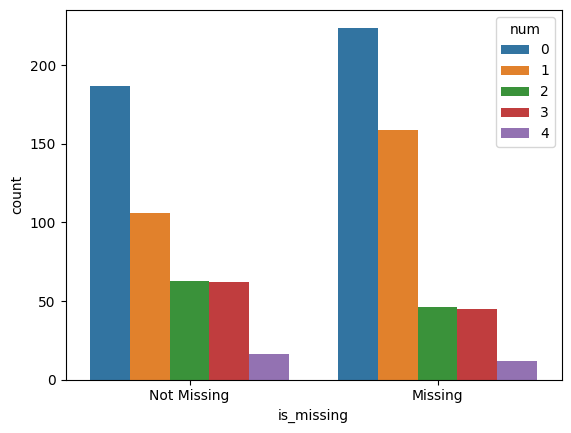

In [ ]:
data['is_missing'] = data['thal'].isnull()

# Plot the distribution of the target variable based on whether a value is missing or not
sns.countplot(x='is_missing', hue='num', data=data)
plt.xticks([0, 1], ['Not Missing', 'Missing'])
plt.legend(title='num')
plt.show();

Again, there are a lot of missing values in this feature, interestingly for the first class 0. Reasonably, most patients with normal defect are the ones with the majority of no heart disease diagnosis and the once with a reversible defect are dominated by a positive diagnosis. Fixed defect, being the one irreversible, understandably has the least number of healthy patients. This feature also seems crucial, and a good handling of its missing values is required.

In [ ]:
data.groupby("num")["thal"].value_counts()

num  thal             
0    normal               138
     reversable defect     38
     fixed defect          11
1    reversable defect     63
     normal                30
     fixed defect          13
2    reversable defect     37
     normal                14
     fixed defect          12
3    reversable defect     43
     normal                12
     fixed defect           7
4    reversable defect     11
     fixed defect           3
     normal                 2
Name: thal, dtype: int64

To replace the missing values, we're once again considering class-specific mode imputation as our reeasonable, most recommended solution.

In [ ]:
#Replacing missing values

#for each class we change by its mode
mode_thalch = data.groupby('num')['thal'].apply(lambda x: x.mode()[0])

# replace missing values in the 'thal' column with the mode of each class
data['thal'] = data.apply(lambda x: x['thal'] if pd.notna(x['thal']) else mode_thalch[x['num']], axis=1)

In [ ]:
data.isnull().sum()/920

id                 0.0
age                0.0
trestbps           0.0
chol               0.0
fbs                0.0
restecg            0.0
thalch             0.0
exang              0.0
oldpeak            0.0
slope              0.0
ca                 0.0
thal               0.0
num                0.0
Female             0.0
Male               0.0
Cleveland          0.0
Hungary            0.0
Switzerland        0.0
VA Long Beach      0.0
asymptomatic       0.0
atypical angina    0.0
non-anginal        0.0
typical angina     0.0
is_missing         0.0
dtype: float64

#### **Feature Encoding**

In [ ]:
#creating the slope column as integer
data["thal"] = data["thal"].map({"normal": 0, "reversable defect" : 1,"fixed defect" : 2})

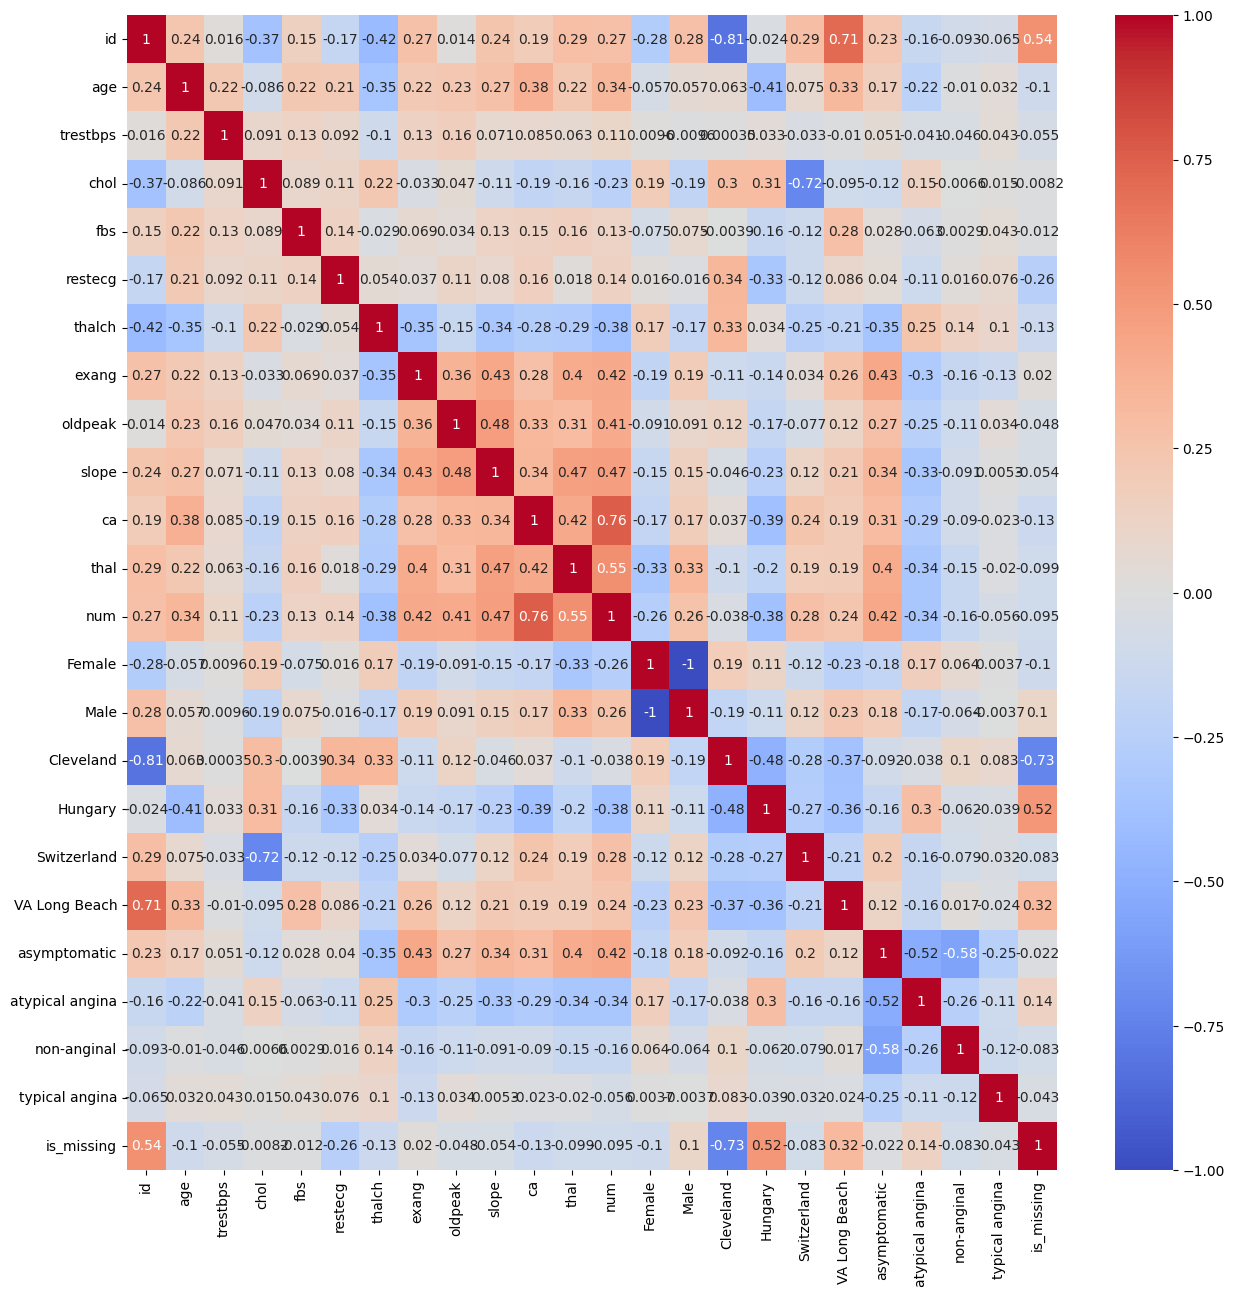

In [ ]:
#Plotting the correlation matrix to understand the correlation between the different features
plt.figure(figsize=(15, 15))  # Set the figure size
corr_matrix = data.corr()
# plot correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
# show plot
plt.show();

There seems to be high correlations now especially between num and cp, but when we deleted them we were met with lower accuracy for the upcoming Classification algorithms.

### **Class Imbalance**

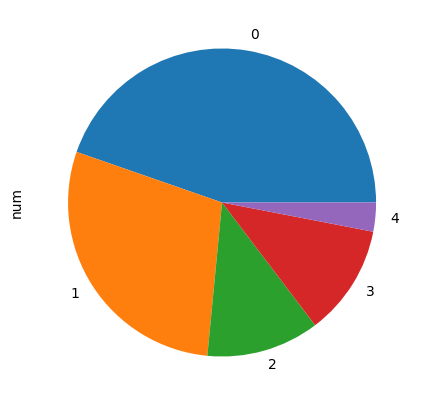

In [ ]:
num=data['num'].value_counts()
num.plot(kind='pie',figsize=(10, 5));

As we can see above, and as concluded from our feature engineering work, it's clear that we have a class imbalance within our dataset, especially when it comes to the the last and most serious heart disease type. Here it seems that the gravity of the heart disease is negatively correlated with the number of ill patients. It could be an interesting point to leverage in the model, but we still need to explore this class Imbalance and fix it. Here we're obviously lacking in a lot of classes so we're going to oversample them using the SMOTE algorithm. We've also researched class Imbalance and interestingly, a lot of data scientists don't treat it as a bad thing, instead, as mentioned above, it could be a good indication and there are even some discussions that insist that our model shouldn't be fed equal percentages of classes, as it doesn't truly reflect the reality of data, which is partially true. Since ML is usually an iterative process, we're definitely taking this into consideration, and we're planning to edit, fine-tune, and improve our model along the way and train it differently and judge for ourselves.

In [ ]:
#SMOTE for imbalanced classification
#This technique is used for oversampling imbalanced classification datasets

In [ ]:
#installing the imblearn library
! pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import imblearn
print(imblearn.__version__)

0.10.1


In [ ]:
#importing our libraries
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

44.67391304347826
Class=0, n=411 (44.674%)
11.847826086956522
Class=2, n=109 (11.848%)
28.804347826086957
Class=1, n=265 (28.804%)
11.630434782608695
Class=3, n=107 (11.630%)
3.0434782608695654
Class=4, n=28 (3.043%)


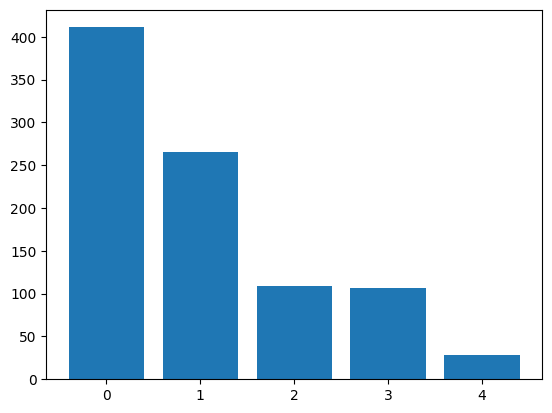

In [ ]:
# split into input and output elements
X = data.drop(columns=['num'])  # features
y = data["num"]   # target
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print(per)
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=0, n=411 (20.000%)
Class=2, n=411 (20.000%)
Class=1, n=411 (20.000%)
Class=3, n=411 (20.000%)
Class=4, n=411 (20.000%)


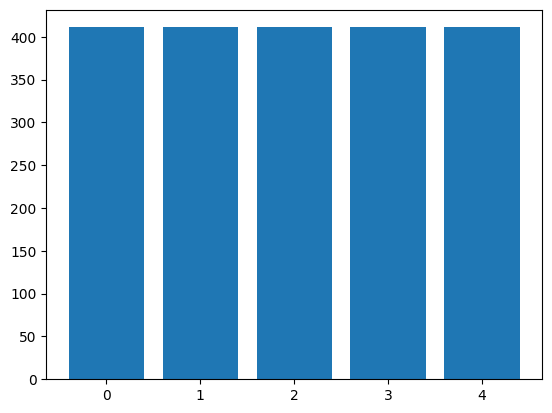

In [ ]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Finally, the class Imbalance issue is solved and we have equal class parts, see you in model development!

## **Classification**

### **Random Forest**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [ ]:
pred=rf.predict(X_train)
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       290
           1       1.00      1.00      1.00       287
           2       1.00      1.00      1.00       284
           3       1.00      1.00      1.00       287
           4       1.00      1.00      1.00       290

    accuracy                           1.00      1438
   macro avg       1.00      1.00      1.00      1438
weighted avg       1.00      1.00      1.00      1438



In [ ]:
# Initialiser un modèle de forêt aléatoire avec 100 arbres de décision
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle sur l'ensemble d'entraînement
rf.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = rf.predict(X_test)

# Afficher le rapport de classification
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       121
           1       0.95      0.88      0.91       124
           2       0.88      0.87      0.87       127
           3       0.87      0.89      0.88       124
           4       0.95      1.00      0.97       121

    accuracy                           0.92       617
   macro avg       0.92      0.92      0.92       617
weighted avg       0.92      0.92      0.92       617



In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X, y, cv=10)  # cv=5 indicates 5-fold cross-validation

# Print the accuracy scores for each fold
print("Accuracy scores:", scores)

# Calculate and print the mean accuracy
mean_accuracy = scores.mean()
print("Mean accuracy:", mean_accuracy)

Accuracy scores: [0.74271845 0.90291262 0.9223301  0.91262136 0.97087379 0.98536585
 0.95121951 0.97560976 0.93658537 0.95121951]
Mean accuracy: 0.9251456310679613


Based on the model's performance on the test set, it does not seem to be overfitting. The precision, recall, and F1-scores for each class are consistent with the values obtained on the training set. The accuracy, macro average, and weighted average scores are also similar between the training and test sets.
We believe that since the performance measures remain consistent and that there isn't really a significant drop in scores between the training and the testing set, the model is generalizing well and not overly biased towards the training data.

### **SVM**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [ ]:
# Create an SVM classifier
svm_classifier = SVC()

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's accuracy

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       124
           1       0.89      0.77      0.83       121
           2       0.58      0.75      0.65       110
           3       0.84      0.56      0.67       132
           4       0.85      0.98      0.91       130

    accuracy                           0.80       617
   macro avg       0.81      0.80      0.79       617
weighted avg       0.81      0.80      0.80       617



In [ ]:
pred=svm_classifier.predict(X_train)
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       287
           1       0.96      0.89      0.92       290
           2       0.77      0.85      0.81       301
           3       0.85      0.73      0.78       279
           4       0.91      1.00      0.95       281

    accuracy                           0.88      1438
   macro avg       0.89      0.88      0.88      1438
weighted avg       0.89      0.88      0.88      1438



In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm_classifier, X, y, cv=5)  # cv=5 indicates 5-fold cross-validation

# Print the accuracy scores for each fold
print("Accuracy scores:", scores)

# Calculate and print the mean accuracy
mean_accuracy = scores.mean()
print("Mean accuracy:", mean_accuracy)

Accuracy scores: [0.68126521 0.81508516 0.8783455  0.84914842 0.74939173]
Mean accuracy: 0.794647201946472


the SVM model shows reasonably good performance on both the training and test sets, with higher accuracy and performance metrics on the training set compared to the test set. However, there is still some variation in the performance across different classes, with certain classes having higher precision, recall, and F1-score than others.

### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model for multiclass classification using multinomial
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Train the model on the training data
logreg.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [ ]:
# Make predictions on the test data
y_pred = logreg.predict(X_test)

In [ ]:
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.61      0.87      0.71        75
           1       0.41      0.43      0.42        54
           2       0.00      0.00      0.00        25
           3       0.50      0.23      0.32        26
           4       0.00      0.00      0.00         4

    accuracy                           0.51       184
   macro avg       0.30      0.30      0.29       184
weighted avg       0.44      0.51      0.46       184



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The low accuracy and performance metrics suggest that the logistic regression model is struggling to effectively classify instances in our multiclass problem. It is possible that the dataset is complex or contains imbalanced class distributions, making it challenging for the logistic regression model to capture the underlying patterns and relationships accurately. As we all know, decision trees, random forests, and SVMs are more suitable for multiclass classification which is demonstrated through the difference in performance on our dataset.